# Подготовка данных

## Цель
На этом шаге мы подключаем инструменты для анализа и загружаем исходные таблицы.

**Что выполняется:**
- Загружаем список проектов с последним месяцем реализации и закреплённым менеджером.  
- Загружаем таблицу с финансовыми данными об отгрузках по проектам.  
- Просматриваем первые строки и размеры таблиц, чтобы убедиться в корректности загрузки.  

Таким образом, мы подготавливаем данные для дальнейших расчётов коэффициентов пролонгации.

In [119]:
import pandas as pd
import numpy as np

# Загрузка данных из CSV файлов
prolongations = pd.read_csv('data/prolongations.csv')
financial_data = pd.read_csv('data/financial_data.csv')

# Просмотр первых нескольких строк каждого датасета
print("Датасет пролонгаций:")
print(prolongations.head())
print("\nДатасет финансовых данных:")
print(financial_data.head())

print("\nРазмеры датасетов:")
print(f"Пролонгации: {prolongations.shape}")
print(f"Финансовые данные: {financial_data.shape}")

Датасет пролонгаций:
    id        month                             AM
0   42  ноябрь 2022   Васильев Артем Александрович
1  453  ноябрь 2022   Васильев Артем Александрович
2  548  ноябрь 2022      Михайлов Андрей Сергеевич
3   87  ноябрь 2022  Соколова Анастасия Викторовна
4  429  ноябрь 2022  Соколова Анастасия Викторовна

Датасет финансовых данных:
    id        Причина дубля Ноябрь 2022 Декабрь 2022 Январь 2023 Февраль 2023  \
0   42                  NaN   36 220,00          NaN         NaN          NaN   
1  657  первая часть оплаты        стоп          NaN         NaN          NaN   
2  657  вторая часть оплаты        стоп          NaN         NaN          NaN   
3  594                  NaN        стоп          NaN         NaN          NaN   
4  665                  NaN   10 000,00          NaN         NaN          NaN   

  Март 2023 Апрель 2023 Май 2023 Июнь 2023 Июль 2023 Август 2023  \
0       NaN         NaN      NaN       NaN       NaN         NaN   
1       NaN         Na

# Проверка структуры данных

- Смотрим список колонок и месяцы в таблицах.  
- Отделяем служебные поля от колонок с суммами отгрузок.  
- Зачем: убедиться, что данные полные и месяцы определены правильно.  
- Итог: знаем, с какими полями будем работать в расчётах.

In [120]:
# Просмотр столбцов каждого датасета
print("Столбцы датасета пролонгаций:")
print(prolongations.columns.tolist())

print("\nСтолбцы датасета финансовых данных:")
print(financial_data.columns.tolist())

# Проверка уникальных значений в ключевых столбцах
print("\nУникальные месяцы в датасете пролонгаций:")
print(prolongations['month'].unique())

# Проверка диапазона дат в финансовых данных
financial_columns = financial_data.columns.tolist()
date_columns = [col for col in financial_columns if col not in ['id', 'Причина дубля', 'Account']]
print(f"\nСтолбцы с датами в финансовых данных: {date_columns}")

Столбцы датасета пролонгаций:
['id', 'month', 'AM']

Столбцы датасета финансовых данных:
['id', 'Причина дубля', 'Ноябрь 2022', 'Декабрь 2022', 'Январь 2023', 'Февраль 2023', 'Март 2023', 'Апрель 2023', 'Май 2023', 'Июнь 2023', 'Июль 2023', 'Август 2023', 'Сентябрь 2023', 'Октябрь 2023', 'Ноябрь 2023', 'Декабрь 2023', 'Январь 2024', 'Февраль 2024', 'Account']

Уникальные месяцы в датасете пролонгаций:
['ноябрь 2022' 'декабрь 2022' 'январь 2023' 'февраль 2023' 'март 2023'
 'апрель 2023' 'май 2023' 'июнь 2023' 'июль 2023' 'август 2023'
 'сентябрь 2023' 'октябрь 2023' 'ноябрь 2023' 'декабрь 2023']

Столбцы с датами в финансовых данных: ['Ноябрь 2022', 'Декабрь 2022', 'Январь 2023', 'Февраль 2023', 'Март 2023', 'Апрель 2023', 'Май 2023', 'Июнь 2023', 'Июль 2023', 'Август 2023', 'Сентябрь 2023', 'Октябрь 2023', 'Ноябрь 2023', 'Декабрь 2023', 'Январь 2024', 'Февраль 2024']


# Проверка финансовых данных

- Просматриваем первые строки таблицы.  
- Проверяем значения за январь 2023, ищем спецметки (`стоп`).  
- Зачем: исключить остановленные проекты, чтобы не искажать коэффициенты.  
- Итог: определены проекты, которые не должны входить в расчёты.

In [121]:
# Лимитируем выборку для удобства
print("Пример данных о финансах:")
print(financial_data.head(10))

# Проверка уникальных значений в колонке Январь 2023
print("\nУникальные значения в колонке Январь 2023:")
print(financial_data['Январь 2023'].unique())

# Проверка проектов с отметкой 'стоп'
print("\nПроекты со значением 'стоп':")
stopped_projects = financial_data[financial_data['Январь 2023'] == 'стоп']
print(stopped_projects.head())

Пример данных о финансах:
    id        Причина дубля Ноябрь 2022 Декабрь 2022 Январь 2023 Февраль 2023  \
0   42                  NaN   36 220,00          NaN         NaN          NaN   
1  657  первая часть оплаты        стоп          NaN         NaN          NaN   
2  657  вторая часть оплаты        стоп          NaN         NaN          NaN   
3  594                  NaN        стоп          NaN         NaN          NaN   
4  665                  NaN   10 000,00          NaN         NaN          NaN   
5  637                  NaN   38 045,00          NaN         NaN          NaN   
6  419                  NaN         NaN          NaN         NaN          NaN   
7  578                  NaN   82 800,00          NaN         NaN          NaN   
8  579                  NaN      в ноль          NaN         NaN          NaN   
9  592  первая часть оплаты   92 302,00          NaN         NaN          NaN   

  Март 2023 Апрель 2023 Май 2023 Июнь 2023 Июль 2023 Август 2023  \
0       NaN   

# Очистка финансовых данных

- **Что делаем**  
  - Переводим все значения в колонках с месяцами в числовой формат.  
  - Убираем спецобозначения (`стоп`, `в ноль`) и превращаем их в **0**, чтобы не искажали расчёты.  
  - Преобразуем российский формат чисел (`36 220,00`) в стандартный (`36220.00`).  

- **Зачем**  
  - Чтобы все данные об отгрузках были в едином числовом виде.  
  - Это позволяет без ошибок суммировать и рассчитывать коэффициенты.  

- **Итог**  
  - Финансовая таблица очищена: месячные суммы приведены к float, ненужные значения заменены.  
  - Данные готовы к дальнейшему анализу.

In [122]:
import re

# Функция для конвертации строковых значений в числовые
def convert_russian_number(value):
    if pd.isna(value) or value == 'NaN':
        return np.nan
    if isinstance(value, str):
        # Обработка специальных значений
        if value.strip().lower() == 'стоп':
            return 0.0  # 'стоп' означает, что проект остановлен, можно считать как 0
        if value.strip().lower() == 'в ноль':
            return 0.0  # 'в ноль' означает ноль
        if value.strip() == 'nan':
            return np.nan
        
        # Конвертация чисел с русским форматомированием
        # Удаление пробелов и замена запятой на точку
        cleaned_value = value.replace(' ', '').replace(',', '.')
        try:
            return float(cleaned_value)
        except:
            return np.nan
    return float(value)

# Очистка всех дата колонок в financial_data от русских числовых форматов и специальных значений
date_columns = [col for col in financial_data.columns if col not in ['id', 'Причина дубля', 'Account']]
financial_data_cleaned = financial_data.copy()

for col in date_columns:
    financial_data_cleaned[col] = financial_data[col].apply(convert_russian_number)

print("Очищенные данные о финансах (пример):")
print(financial_data_cleaned.head(10))

# Проверка типов данных после очистки
print("\nТипы данных после очистки:")
print(financial_data_cleaned.dtypes)

Очищенные данные о финансах (пример):
    id        Причина дубля  Ноябрь 2022  Декабрь 2022  Январь 2023  \
0   42                  NaN          NaN           NaN          NaN   
1  657  первая часть оплаты          0.0           NaN          NaN   
2  657  вторая часть оплаты          0.0           NaN          NaN   
3  594                  NaN          0.0           NaN          NaN   
4  665                  NaN          NaN           NaN          NaN   
5  637                  NaN          NaN           NaN          NaN   
6  419                  NaN          NaN           NaN          NaN   
7  578                  NaN          NaN           NaN          NaN   
8  579                  NaN          0.0           NaN          NaN   
9  592  первая часть оплаты          NaN           NaN          NaN   

   Февраль 2023  Март 2023  Апрель 2023  Май 2023  Июнь 2023  Июль 2023  \
0           NaN        NaN          NaN       NaN        NaN        NaN   
1           NaN        NaN    

# Приведение данных к числовому виду

- **Что делаем**  
  - Преобразуем все значения в колонках с месяцами в числа.  
  - Убираем спецобозначения:  
    - `стоп` и `в ноль` → заменяем на **0**,  
    - пустые строки и `NaN` → превращаем в пропуски.  
  - Конвертируем российский формат чисел (`36 220,00`) в стандартный (`36220.00`).  
  - Проверяем, что типы колонок стали числовыми и смотрим сводную статистику по первым месяцам.

- **Зачем**  
  - Чтобы данные по отгрузкам были единообразными и без «мусорных» значений.  
  - Это позволяет надёжно считать суммы и коэффициенты пролонгации.

- **Итог**  
  - Все месячные данные приведены к float.  
  - Очищенные таблицы можно использовать для дальнейших вычислений и построения отчётов.

In [123]:
import re

# Функция для преобразования строковых значений в числовые
def convert_russian_number(value):
    if pd.isna(value) or value == 'NaN' or str(value).strip() == 'nan':
        return np.nan
    if isinstance(value, str):
        # Обработка специальных значений
        if value.strip().lower() == 'стоп':
            return 0.0  # 'стоп' означает, что проект остановлен, можно считать как 0
        if value.strip().lower() == 'в ноль':
            return 0.0  # 'в ноль' означает ноль
        if value.strip() == '':
            return np.nan

        # Преобразование чисел с русским форматом (например, "36 220,00") в стандартный float
        # Удаление пробелов и замена запятой на точку
        cleaned_value = value.replace(' ', '').replace(',', '.')
        try:
            return float(cleaned_value)
        except:
            return np.nan
    return np.nan

# Очистка всех колонок с датами в financial_data от русских числовых форматов и специальных значений
date_columns = [col for col in financial_data.columns if col not in ['id', 'Причина дубля', 'Account']]
financial_data_cleaned = financial_data.copy()

for col in date_columns:
    financial_data_cleaned[col] = financial_data[col].apply(convert_russian_number)

print("Пример очищенных данных о финансах:")
print(financial_data_cleaned.head(10))

# Проверка типов данных после очистки
print("\nТипы данных после очистки:")
print(financial_data_cleaned[date_columns].dtypes)

# Проверка некоторых сводных статистик
print("\nСводная статистика по финансовым данным (первые несколько месяцев):")
for col in date_columns[:5]:
    print(f"{col}: {financial_data_cleaned[col].describe()}")

Пример очищенных данных о финансах:
    id        Причина дубля  Ноябрь 2022  Декабрь 2022  Январь 2023  \
0   42                  NaN          NaN           NaN          NaN   
1  657  первая часть оплаты          0.0           NaN          NaN   
2  657  вторая часть оплаты          0.0           NaN          NaN   
3  594                  NaN          0.0           NaN          NaN   
4  665                  NaN          NaN           NaN          NaN   
5  637                  NaN          NaN           NaN          NaN   
6  419                  NaN          NaN           NaN          NaN   
7  578                  NaN          NaN           NaN          NaN   
8  579                  NaN          0.0           NaN          NaN   
9  592  первая часть оплаты          NaN           NaN          NaN   

   Февраль 2023  Март 2023  Апрель 2023  Май 2023  Июнь 2023  Июль 2023  \
0           NaN        NaN          NaN       NaN        NaN        NaN   
1           NaN        NaN      

# Проверка наличия фактических отгрузок

- **Что делаем**  
  - Отбираем проекты, где в колонках **Ноябрь 2022** и **Декабрь 2022** есть реальные суммы.  
  - Исключаем строки с отметками `стоп` и `в ноль`, так как они не отражают выручку.  
  - Выводим первые примеры проектов с фактическими данными.  

- **Зачем**  
  - Чтобы убедиться, что в исходных данных действительно есть корректные значения по выручке за нужные месяцы.  
  - Это подтверждает, что после очистки таблицы можно опираться на эти данные для расчётов.  

- **Итог**  
  - Получены списки проектов с реальными отгрузками за ноябрь и декабрь 2022 года.  
  - Эти данные войдут в дальнейший анализ коэффициентов пролонгации.

In [124]:
# Проверка проектов с реальной выручкой за Ноябрь 2022 и Декабрь 2022
print("Проекты с фактической выручкой за Ноябрь 2022:")
nov_revenue = financial_data_cleaned[
    financial_data_cleaned['Ноябрь 2022'].notna() & 
    (financial_data_cleaned['Ноябрь 2022'] != 0)
]
print(nov_revenue[['id', 'Ноябрь 2022']].head(10))

print("\nПроекты с фактической выручкой за Декабрь 2022:")
dec_revenue = financial_data_cleaned[
    financial_data_cleaned['Декабрь 2022'].notna() & 
    (financial_data_cleaned['Декабрь 2022'] != 0)
]
print(dec_revenue[['id', 'Декабрь 2022']].head(10))

Проекты с фактической выручкой за Ноябрь 2022:
     id  Ноябрь 2022
14  704        945.0

Проекты с фактической выручкой за Декабрь 2022:
Empty DataFrame
Columns: [id, Декабрь 2022]
Index: []


# Очистка и проверка данных по выручке

- **Что делаем**  
  - Очищаем значения: убираем спецсимволы (пробелы, `\xa0`), заменяем запятую на точку.  
  - Все некорректные записи (`nan`, `стоп`, `в ноль`, пустые) переводим в пропуски.  
  - Приводим все месячные колонки к числовому формату.  
  - Проверяем результат на примере проектов с данными за **ноябрь** и **декабрь 2022**.  

- **Зачем**  
  - Чтобы убедиться, что после преобразования мы работаем с «чистыми» числами, а не со строками или спецметками.  
  - Контрольные выборки показывают, что данные читаются корректно и пригодны для расчётов.  

- **Итог**  
  - Все месячные суммы приведены к float.  
  - Реальные проекты с выручкой за ноябрь и декабрь отображаются корректно, данные готовы к дальнейшему анализу.

In [125]:
import re

# Функция для преобразования строковых значений в числовые
def convert_russian_number(value):
    if pd.isna(value) or str(value).strip() in ['nan', 'стоп', 'в ноль', '']:
        return np.nan
    if isinstance(value, str):
        # Удаление неразрывных пробелов (например, \xa0) и обычных пробелов
        # Замена запятой на точку для десятичного разделителя
        cleaned_value = re.sub(r'[\s\xa0]', '', value).replace(',', '.')
        try:
            return float(cleaned_value)
        except:
            return np.nan
    return float(value)

# Очистка всех колонок с датами в financial_data от русских числовых форматов и специальных значений
date_columns = [col for col in financial_data.columns if col not in ['id', 'Причина дубля', 'Account']]
financial_data_cleaned = financial_data.copy()

for col in date_columns:
    financial_data_cleaned[col] = financial_data[col].apply(convert_russian_number)

print("Пример очищенных данных о финансах (с преобразованными значениями):")
print(financial_data_cleaned.head(15))

# Проверка некоторых преобразованных значений
print("\nНекоторые преобразованные значения выручки:")
nov_revenue_cleaned = financial_data_cleaned[financial_data_cleaned['Ноябрь 2022'].notna()]
print("Выручка за Ноябрь 2022:")
print(nov_revenue_cleaned[['id', 'Ноябрь 2022']].head(5))

dec_revenue_cleaned = financial_data_cleaned[financial_data_cleaned['Декабрь 2022'].notna()]
print("\nВыручка за Декабрь 2022:")
print(dec_revenue_cleaned[['id', 'Декабрь 2022']].head(5))

Пример очищенных данных о финансах (с преобразованными значениями):
     id        Причина дубля  Ноябрь 2022  Декабрь 2022  Январь 2023  \
0    42                  NaN      36220.0           NaN          NaN   
1   657  первая часть оплаты          NaN           NaN          NaN   
2   657  вторая часть оплаты          NaN           NaN          NaN   
3   594                  NaN          NaN           NaN          NaN   
4   665                  NaN      10000.0           NaN          NaN   
5   637                  NaN      38045.0           NaN          NaN   
6   419                  NaN          NaN           NaN          NaN   
7   578                  NaN      82800.0           NaN          NaN   
8   579                  NaN          NaN           NaN          NaN   
9   592  первая часть оплаты      92302.0           NaN          NaN   
10  592  вторая часть оплаты      12340.0           NaN          NaN   
11  666                  NaN     110000.0           NaN          NaN

# Анализ данных о пролонгациях

- **Что проверяем**  
  - Общую структуру таблицы `prolongations` (тип данных, количество строк и столбцов).  
  - Примеры первых строк, чтобы убедиться, что в данных есть ID проектов, месяц завершения и закреплённый менеджер.  
  - Список уникальных аккаунт-менеджеров (чтобы видеть, по кому будем строить показатели).  
  - Перечень месяцев, которые отражены в таблице (диапазон дат для анализа).  

- **Зачем**  
  - Чтобы убедиться, что таблица корректна и содержит всё необходимое: проекты, даты завершения и ответственных менеджеров.  

- **Итог**  
  - Получили список менеджеров и временной охват данных, что позволит строить аналитику по каждому сотруднику и по отделу в целом.

In [126]:
# Дополнительные проверки датасетов
print("Информация о датасете пролонгаций:")
print(prolongations.info())
print("\nПример данных из датасета пролонгаций:")
print(prolongations.head(10))

# Проверка уникальных менеджеров аккаунтов
print("\nУникальные аккаунт-менеджеры:")
print(prolongations['AM'].unique())

# Проверка охвата по времени
print("\nМесяцы, охваченные в данных по пролонгациям:")
print(prolongations['month'].unique())

Информация о датасете пролонгаций:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      477 non-null    int64 
 1   month   477 non-null    object
 2   AM      477 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.3+ KB
None

Пример данных из датасета пролонгаций:
    id        month                             AM
0   42  ноябрь 2022   Васильев Артем Александрович
1  453  ноябрь 2022   Васильев Артем Александрович
2  548  ноябрь 2022      Михайлов Андрей Сергеевич
3   87  ноябрь 2022  Соколова Анастасия Викторовна
4  429  ноябрь 2022  Соколова Анастасия Викторовна
5  600  ноябрь 2022   Васильев Артем Александрович
6  657  ноябрь 2022   Васильев Артем Александрович
7  594  ноябрь 2022   Васильев Артем Александрович
8  665  ноябрь 2022   Васильев Артем Александрович
9  586  ноябрь 2022        Иванова Мария Сергеевна

Уникальные аккаунт-мене

# Подготовка календаря для анализа

- **Что делаем**  
  - Создаём словарь соответствия между русскими и английскими названиями месяцев (чтобы упростить обработку).  
  - Формируем упорядоченный список месяцев с присвоением каждому порядкового номера.  
  - Добавляем обратное отображение (номер → название месяца).  
  - Проверяем результат, выводя все доступные месяцы в правильной последовательности.  

- **Зачем**  
  - Чтобы построить единый календарь и работать с месяцами как с числовыми индексами.  
  - Это нужно для корректных расчётов коэффициентов пролонгации «первого» и «второго» месяца.  

- **Итог**  
  - Определён полный диапазон месяцев (с ноября 2022 по февраль 2024) и их порядок.  
  - Данные готовы для помесячного анализа пролонгаций.

In [127]:
# Первое, давайте создадим сопоставление между русскими названиями месяцев и их английскими эквивалентами для облегчения обработки
russian_months = {
    'январь': 'January',
    'февраль': 'February',
    'март': 'March',
    'апрель': 'April',
    'май': 'May',
    'июнь': 'June',
    'июль': 'July',
    'август': 'August',
    'сентябрь': 'September',
    'октябрь': 'October',
    'ноябрь': 'November',
    'декабрь': 'December'
}

# Создание сопоставления месяцев с их порядком
months_order = {
    'Ноябрь 2022': 1,
    'Декабрь 2022': 2,
    'Январь 2023': 3,
    'Февраль 2023': 4,
    'Март 2023': 5,
    'Апрель 2023': 6,
    'Май 2023': 7,
    'Июнь 2023': 8,
    'Июль 2023': 9,
    'Август 2023': 10,
    'Сентябрь 2023': 11,
    'Октябрь 2023': 12,
    'Ноябрь 2023': 13,
    'Декабрь 2023': 14,
    'Январь 2024': 15,
    'Февраль 2024': 16
}

# Инвертируем словарь для отображения порядкового номера в название месяца
order_months = {v: k for k, v in months_order.items()}

print("Доступные месяцы в финансовых данных:")
for i in sorted(order_months.keys()):
    print(f"{i}: {order_months[i]}")

Доступные месяцы в финансовых данных:
1: Ноябрь 2022
2: Декабрь 2022
3: Январь 2023
4: Февраль 2023
5: Март 2023
6: Апрель 2023
7: Май 2023
8: Июнь 2023
9: Июль 2023
10: Август 2023
11: Сентябрь 2023
12: Октябрь 2023
13: Ноябрь 2023
14: Декабрь 2023
15: Январь 2024
16: Февраль 2024


# Агрегация финансовых данных по проектам

- **Что делаем**  
  - Учитываем, что один проект может встречаться в таблице несколько раз (из-за «Причины дубля»).  
  - Для каждого `id` проекта суммируем все месячные отгрузки, чтобы получить единую строку на проект.  
  - Для поля `Account` (аккаунт-менеджер) берём первое ненулевое значение.  

- **Зачем**  
  - Чтобы убрать дубли и работать с чистой консолидацией по каждому проекту.  
  - Это исключает искажения в итоговых расчётах.  

- **Итог**  
  - Получена сводная таблица: один проект = одна строка, все месяцы = суммы.  
  - Данные готовы для дальнейшего объединения с таблицей пролонгаций.

In [128]:
# Сначала агрегируем финансовые данные по ID проекта, чтобы получить общую выручку по проекту за каждый месяц.
# Это поможет обработать проекты с несколькими строками (например, из-за "Причина дубля").

financial_data_cleaned['Account'] = financial_data['Account']

# Группируем данные по ID проекта и суммируем выручку за каждый месяц.
financial_agg = financial_data_cleaned.groupby('id')[date_columns + ['Account']].sum(min_count=1)

# Для колонки Account берем первое ненулевое значение.
account_mapping = financial_data_cleaned.groupby('id')['Account'].first()

print("Пример агрегированных финансовых данных:")
print(financial_agg.head(10))

Пример агрегированных финансовых данных:
    Ноябрь 2022  Декабрь 2022  Январь 2023  Февраль 2023  Март 2023  \
id                                                                    
15     439280.0      439280.0    102433.75     102433.75  102433.75   
16          NaN           NaN          NaN           NaN        NaN   
31      55100.0       55100.0          NaN      44775.00   44775.00   
39     137700.0      137700.0    149206.50     149206.50  149206.50   
42      36220.0           NaN          NaN           NaN        NaN   
45      35150.0       47400.0     49130.00      64475.00   71640.00   
46      37939.5       37939.5     39838.50      39298.50   39298.50   
48          NaN           NaN          NaN      39726.00   39726.00   
49      85842.0       85842.0     83358.00      83358.00   83358.00   
54          NaN           NaN          NaN           NaN   41067.00   

    Апрель 2023  Май 2023  Июнь 2023  Июль 2023  Август 2023  Сентябрь 2023  \
id                         

# Формирование окончательной сводной таблицы по проектам

- **Что делаем**  
  - Берём очищенные данные и агрегируем их по каждому проекту: для всех месячных колонок суммируем значения.  
  - Добавляем информацию об аккаунт-менеджере через ранее созданное сопоставление.  
  - Проверяем пересечение: сколько проектов есть в таблице пролонгаций и сколько из них присутствуют в финансовых данных.  

- **Зачем**  
  - Чтобы получить единую, чистую таблицу «проект → суммы по месяцам + аккаунт».  
  - Контроль пересечений нужен для проверки полноты данных: у всех ли проектов есть и даты завершения, и финансовые показатели.  

- **Итог**  
  - Сформирована консолидация по проектам.  
  - Подтверждено количество проектов, совпадающих в двух источниках, что гарантирует корректность последующих расчётов.

In [129]:
# Создание агрегированного финансового датасета
# Сначала, создадим копию financial_data_cleaned, чтобы избежать проблем с колонкой Account
financial_for_agg = financial_data_cleaned.copy()

# Группируем данные по ID проекта и суммируем выручку за каждый месяц (только колонки с датами)
financial_agg = financial_data_cleaned.groupby('id')[date_columns].sum(min_count=1)

# Добавляем информацию об аккаунт-менеджере, используя созданное ранее сопоставление
financial_agg['Account'] = account_mapping

print("Пример агрегированных финансовых данных:")
print(financial_agg.head(10))

# Проверка проектов в датасете пролонгаций, которые присутствуют в финансовых данных
prolongation_projects = set(prolongations['id'])
financial_projects = set(financial_agg.index)
print(f"\nКоличество проектов в датасете пролонгаций: {len(prolongation_projects)}")
print(f"Количество проектов в финансовом датасете: {len(financial_projects)}")
print(f"Количество проектов, присутствующих в обоих датасетах: {len(prolongation_projects.intersection(financial_projects))}")

Пример агрегированных финансовых данных:
    Ноябрь 2022  Декабрь 2022  Январь 2023  Февраль 2023  Март 2023  \
id                                                                    
15     439280.0      439280.0    102433.75     102433.75  102433.75   
16          NaN           NaN          NaN           NaN        NaN   
31      55100.0       55100.0          NaN      44775.00   44775.00   
39     137700.0      137700.0    149206.50     149206.50  149206.50   
42      36220.0           NaN          NaN           NaN        NaN   
45      35150.0       47400.0     49130.00      64475.00   71640.00   
46      37939.5       37939.5     39838.50      39298.50   39298.50   
48          NaN           NaN          NaN      39726.00   39726.00   
49      85842.0       85842.0     83358.00      83358.00   83358.00   
54          NaN           NaN          NaN           NaN   41067.00   

    Апрель 2023  Май 2023  Июнь 2023  Июль 2023  Август 2023  Сентябрь 2023  \
id                         

# Расчёт коэффициентов пролонгации (помесячно по AM, 2023)

- **Что делаем**
  - По каждому месяцу 2023 считаем два коэффициента для каждого аккаунт-менеджера:
    - **C1 (1-й месяц):** проекты, завершённые в *(m−1)* → выручка в *m* / выручка в *(m−1)*.
    - **C2 (2-й месяц):** проекты, завершённые в *(m−2)* **без выручки в *(m−1)*** → выручка в *m* / выручка в *(m−2)*.
  - Берём списки проектов и AM из `prolongations`, суммы по месяцам — из агрегата `financial_agg`.

- **Как считаем**
  - Для C1: по проектам, завершённым в *(m−1)*, суммируем выручку в *m* (числитель) и в *(m−1)* (знаменатель).
  - Для C2: по проектам, завершённым в *(m−2)* и **без выручки в *(m−1)***, суммируем *m* (числитель) и *(m−2)* (знаменатель).
  - Если знаменатель = 0/нет данных → коэффициент = `NaN` (не считаем).

- **Контроль**
  - В консоль выводится прогресс: обрабатываемый месяц, предыдущие месяцы, число проектов, значения числителей/знаменателей и итоговые коэффициенты.

- **Итог**
  - Возвращаем таблицу с колонками: `month`, `account_manager`, `first_month_coefficient`, `second_month_coefficient` и соответствующими числителями/знаменателями — основа для дашборда и итогов по отделу.

In [130]:
def calculate_prolongation_coefficients():
    """
    Рассчитывает коэффициенты пролонгации для каждого месяца в 2023 году по каждому менеджеру аккаунтов.
    """
    results = []

    # Фильтруем данные по пролонгациям за 2023 год
    prolongations_2023 = prolongations[prolongations['month'].str.contains('2023')]

    # Получаем уникальные месяцы и сортируем их
    unique_months = sorted(prolongations_2023['month'].unique(), key=lambda x: months_order.get(x, 0))
    print(f"Месяцы для анализа: {unique_months}")

    # Получаем уникальных менеджеров аккаунтов
    account_managers = prolongations_2023['AM'].unique()
    print(f"Менеджеры аккаунтов: {account_managers}")

    # Для каждого месяца в 2023 году рассчитываем коэффициенты
    for month in unique_months:
        if month not in months_order:
            continue
            
        month_index = months_order[month]
        print(f"\nОбработка {month} (индекс: {month_index})")

        # Находим предыдущий месяц (для расчета коэффициента первого месяца)
        prev_month_index = month_index - 1
        if prev_month_index in order_months:
            prev_month = order_months[prev_month_index]
        else:
            print(f"Нет предыдущего месяца для {month}")
            continue

        # Находим месяц перед предыдущим (для расчета коэффициента второго месяца)
        prev2_month_index = month_index - 2
        if prev2_month_index in order_months:
            prev2_month = order_months[prev2_month_index]
        else:
            print(f"Нет второго предыдущего месяца для {month}")
            continue

        print(f"Предыдущий месяц: {prev_month}")
        print(f"Второй предыдущий месяц: {prev2_month}")

        # Получаем проекты, завершенные в предыдущем месяце
        projects_prev_month = prolongations_2023[prolongations_2023['month'] == prev_month]['id'].tolist()
        print(f"Проекты, завершенные в {prev_month}: {len(projects_prev_month)}")

        # Получаем проекты, завершенные во втором предыдущем месяце
        projects_prev2_month = prolongations_2023[prolongations_2023['month'] == prev2_month]['id'].tolist()
        print(f"Проекты, завершенные в {prev2_month}: {len(projects_prev2_month)}")

        # Для каждого менеджера аккаунтов рассчитываем коэффициенты
        for am in account_managers:
            # Первый коэффициент: проекты, завершенные в предыдущем месяце
            # Числитель: выручка этих проектов в текущем месяце
            # Знаменатель: выручка этих проектов в предыдущем месяце

            # Получаем проекты для этого менеджера, завершенные в предыдущем месяце
            am_projects_prev = prolongations_2023[
            (prolongations_2023['month'] == prev_month) & 
            (prolongations_2023['AM'] == am)
            ]['id'].tolist()
            
            print(f"  {am} - проекты, завершенные в {prev_month}: {len(am_projects_prev)}")
            
            # Вычисляем числитель и знаменатель для первого коэффициента
            numerator_first = 0
            denominator_first = 0
            
            for project_id in am_projects_prev:
                if project_id in financial_agg.index:
                    project_data = financial_agg.loc[project_id]
                    # Добавляем выручку предыдущего месяца в знаменатель
                    if pd.notna(project_data[prev_month]):
                        denominator_first += project_data[prev_month]
                    # Добавляем выручку текущего месяца в числитель
                    if pd.notna(project_data[month]):
                        numerator_first += project_data[month]

            # Вычисляем первый коэффициент
            if denominator_first > 0:
                first_coeff = numerator_first / denominator_first
            else:
                first_coeff = np.nan

            print(f"Первый коэффициент - числитель: {numerator_first}, знаменатель: {denominator_first}, коэффициент: {first_coeff}")

            # Второй коэффициент: проекты, завершенные во втором предыдущем месяце
            # У которых НЕТ выручки в предыдущем месяце, но ЕСТЬ выручка в текущем месяце

            # Получаем проекты для этого менеджера, завершенные во втором предыдущем месяце
            am_projects_prev2 = prolongations_2023[
                (prolongations_2023['month'] == prev2_month) & 
                (prolongations_2023['AM'] == am)
            ]['id'].tolist()
            
            print(f"  {am} - проекты, завершенные в {prev2_month}: {len(am_projects_prev2)}")
            
            numerator_second = 0
            denominator_second = 0
            
            for project_id in am_projects_prev2:
                if project_id in financial_agg.index:
                    project_data = financial_agg.loc[project_id]
                    # Получаем выручку за предыдущий и текущий месяцы
                    prev_month_rev = project_data[prev_month] if prev_month in project_data.index else np.nan
                    current_month_rev = project_data[month] if month in project_data.index else np.nan

                    # Если нет выручки в предыдущем месяце (nan или 0)
                    if pd.isna(prev_month_rev) or prev_month_rev == 0:
                        # Добавляем выручку за второй предыдущий месяц в знаменатель
                        if pd.notna(project_data[prev2_month]):
                            denominator_second += project_data[prev2_month]
                        # Добавляем выручку за текущий месяц в числитель
                        if pd.notna(current_month_rev):
                            numerator_second += current_month_rev

            # Вычисляем второй коэффициент
            if denominator_second > 0:
                second_coeff = numerator_second / denominator_second
            else:
                second_coeff = np.nan
                
            print(f"Второй коэффициент - числитель: {numerator_second}, знаменатель: {denominator_second}, коэффициент: {second_coeff}")

            # Общие коэффициенты для департамента
            results.append({
                'месяц': month,
                'менеджер_аккаунта': am,
                'коэффициент_первого_месяца': first_coeff,
                'коэффициент_второго_месяца': second_coeff,
                'числитель_первого_месяца': numerator_first,
                'знаменатель_первого_месяца': denominator_first,
                'числитель_второго_месяца': numerator_second,
                'знаменатель_второго_месяца': denominator_second
            })


# Расчёт коэффициентов пролонгации (гармонизация месяцев + логика C1/C2)

- **Смысл шага**
  - Приводим названия месяцев из `prolongations` к формату финансовых данных (единый регистр и вид `Январь 2023`).
  - Считаем по **каждому месяцу 2023** и **каждому AM** два показателя:
    - **C1 (1-й месяц):** выручка в *m* по проектам, завершённым в *(m−1)*, делённая на их выручку в *(m−1)*.
    - **C2 (2-й месяц):** по проектам, завершённым в *(m−2)* **без выручки в *(m−1)*** — выручка в *m* / выручка в *(m−2)*.

- **Ключевые правила**
  - Источник проектов и AM — `prolongations` (AM из него приоритетен).
  - Суммы по месяцам — из агрегата `financial_agg`.
  - Если знаменатель = 0 или отсутствует → коэффициент не считаем (`NaN`).

- **На выходе**
  - Таблица `prolongation_results`: `month`, `account_manager`, `first_month_coefficient` (C1), `second_month_coefficient` (C2) + числители/знаменатели.
  - Готовая база для дашборда и сводки по каждому менеджеру и по отделу.

In [131]:
def calculate_prolongation_coefficients():
    """
    Рассчитывает коэффициенты пролонгации для каждого месяца в 2023 году по каждому менеджеру аккаунтов.
    """
    results = []

    # Функция для преобразования формата месяца
    def convert_month_format(month_str):
        """Конвертирует формат 'январь 2023' в 'Январь 2023'"""
        parts = month_str.split(' ')
        if len(parts) == 2:
            russian_month, year = parts
            capitalized_month = russian_month.capitalize() + ' ' + year
            return capitalized_month
        return month_str

    # Создаем отображение для согласованного наименования месяцев
    month_mapping = {month: convert_month_format(month) for month in prolongations['month'].unique()}
    prolongations_mapped = prolongations.copy()
    prolongations_mapped['month'] = prolongations_mapped['month'].map(month_mapping)

    # Фильтруем месяцы 2023 года, которые существуют в финансовых данных
    months_2023 = [month for month in month_mapping.values() if month in months_order and '2023' in month]
    months_2023 = sorted(months_2023, key=lambda x: months_order[x])
    
    print(f"Месяцы для анализа в 2023 году: {months_2023}")
    
    # Получаем уникальных менеджеров аккаунтов
    account_managers = prolongations_mapped['AM'].unique()
    print(f"Менеджеры аккаунтов: {account_managers}")
    
    # Для каждого месяца в 2023 году рассчитываем коэффициенты
    for month in months_2023:
        month_index = months_order[month]
        print(f"\nОбрабатываем {month} (индекс: {month_index})")
        
        # Найдем предыдущий месяц (для расчета коэффициента первого месяца)
        prev_month_index = month_index - 1
        if prev_month_index in order_months:
            prev_month = order_months[prev_month_index]
        else:
            print(f"Нет предыдущего месяца для {month}")
            continue

        # Найдем месяц перед предыдущим (для расчета коэффициента второго месяца)
        prev2_month_index = month_index - 2
        if prev2_month_index in order_months:
            prev2_month = order_months[prev2_month_index]
        else:
            print(f"Нет второго предыдущего месяца для {month}")
            continue

        print(f"Предыдущий месяц: {prev_month}")
        print(f"Второй предыдущий месяц: {prev2_month}")

        # Для каждого менеджера аккаунтов рассчитываем коэффициенты
        for am in account_managers:
            # Первый коэффициент: проекты, завершенные в предыдущем месяце
            # Числитель: выручка этих проектов в текущем месяце
            # Знаменатель: выручка этих проектов в предыдущем месяце

            # Получаем проекты для этого AM, завершенные в предыдущем месяце
            am_projects_prev = prolongations_mapped[
                (prolongations_mapped['month'] == prev_month) & 
                (prolongations_mapped['AM'] == am)
            ]['id'].tolist()

            # Вычисляем числитель (выручка в текущем месяце) и знаменатель (выручка в предыдущем месяце)
            numerator_first = 0
            denominator_first = 0
            
            for project_id in am_projects_prev:
                if project_id in financial_agg.index:
                    project_data = financial_agg.loc[project_id]
                    # Добавляем выручку предыдущего месяца в знаменатель
                    if prev_month in project_data.index and pd.notna(project_data[prev_month]):
                        denominator_first += project_data[prev_month]
                    # Добавляем выручку текущего месяца в числитель
                    if month in project_data.index and pd.notna(project_data[month]):
                        numerator_first += project_data[month]

            # Вычисляем первый коэффициент
            if denominator_first > 0:
                first_coeff = numerator_first / denominator_first
            else:
                first_coeff = np.nan

            # Второй коэффициент: проекты, завершенные во втором предыдущем месяце
            # У которых НЕТ выручки в предыдущем месяце, но ЕСТЬ выручка в текущем месяце

            # Получаем проекты для этого AM, завершенные во втором предыдущем месяце
            am_projects_prev2 = prolongations_mapped[
                (prolongations_mapped['month'] == prev2_month) & 
                (prolongations_mapped['AM'] == am)
            ]['id'].tolist()
            
            numerator_second = 0
            denominator_second = 0
            
            for project_id in am_projects_prev2:
                if project_id in financial_agg.index:
                    project_data = financial_agg.loc[project_id]
                    # Проверяем, есть ли выручка в предыдущем месяце, но есть ли она в текущем месяце
                    prev_month_rev = project_data[prev_month] if prev_month in project_data.index else np.nan
                    current_month_rev = project_data[month] if month in project_data.index else np.nan

                    # Если нет выручки в предыдущем месяце (nan или 0)
                    if (pd.isna(prev_month_rev) or prev_month_rev == 0) and prev_month in project_data.index:
                        # Добавляем выручку за второй предыдущий месяц в знаменатель
                        if prev2_month in project_data.index and pd.notna(project_data[prev2_month]):
                            denominator_second += project_data[prev2_month]
                        # Добавляем выручку за текущий месяц в числитель
                        if pd.notna(current_month_rev):
                            numerator_second += current_month_rev

            # Вычисляем второй коэффициент
            if denominator_second > 0:
                second_coeff = numerator_second / denominator_second
            else:
                second_coeff = np.nan
            
            # Общие коэффициенты для департамента
            results.append({
                'month': month,
                'account_manager': am,
                'first_month_coefficient': first_coeff,
                'second_month_coefficient': second_coeff,
                'first_month_numerator': numerator_first,
                'first_month_denominator': denominator_first,
                'second_month_numerator': numerator_second,
                'second_month_denominator': denominator_second
            })
    
    return pd.DataFrame(results)

# Запускаем расчет коэффициентов пролонгации
prolongation_results = calculate_prolongation_coefficients()
print("\nПервые результаты:")
print(prolongation_results.head(20))

Месяцы для анализа в 2023 году: ['Январь 2023', 'Февраль 2023', 'Март 2023', 'Апрель 2023', 'Май 2023', 'Июнь 2023', 'Июль 2023', 'Август 2023', 'Сентябрь 2023', 'Октябрь 2023', 'Ноябрь 2023', 'Декабрь 2023']
Менеджеры аккаунтов: ['Васильев Артем Александрович' 'Михайлов Андрей Сергеевич'
 'Соколова Анастасия Викторовна' 'Иванова Мария Сергеевна'
 'Попова Екатерина Николаевна' 'Смирнова Ольга Владимировна'
 'Кузнецов Михаил Иванович' 'без А/М' 'Петрова Анна Дмитриевна'
 'Федорова Марина Васильевна']

Обрабатываем Январь 2023 (индекс: 3)
Предыдущий месяц: Декабрь 2022
Второй предыдущий месяц: Ноябрь 2022

Обрабатываем Февраль 2023 (индекс: 4)
Предыдущий месяц: Январь 2023
Второй предыдущий месяц: Декабрь 2022

Обрабатываем Март 2023 (индекс: 5)
Предыдущий месяц: Февраль 2023
Второй предыдущий месяц: Январь 2023

Обрабатываем Апрель 2023 (индекс: 6)
Предыдущий месяц: Март 2023
Второй предыдущий месяц: Февраль 2023

Обрабатываем Май 2023 (индекс: 7)
Предыдущий месяц: Апрель 2023
Второй пр

# Итоги по году: менеджеры и отдел

- **По каждому AM**
  - Считаем два типа годовых метрик:
    - **Годовой коэффициент (ratio-of-totals):** (сумма числителей) / (сумма знаменателей) по всем месяцам 2023 для C1 и C2.
    - **Средний помесячный коэффициент (simple average):** среднее от помесячных C1 и C2.
  - Также фиксируем базы: суммарные числители/знаменатели за год (для контроля масштаба).

- **По отделу**
  - Помесячно агрегируем суммы числителей/знаменателей по всем AM и считаем **C1dept** и **C2dept** за каждый месяц.
  - Годовые коэффициенты отдела считаем как **ratio-of-totals** по всему 2023.

- **Зачем две годовые метрики**
  - **Ratio-of-totals** отражает реальный вклад выручки (вес больших месяцев выше).  
  - **Средний помесячный** показывает стабильность эффективности независимо от масштаба месяца.

- **Итог**
  - Имеем годовые C1/C2 по каждому AM и по отделу, плюс помесячные значения отдела — база для сравнений и управленческих решений.

In [132]:
# Теперь агрегируем результаты по менеджерам аккаунтов за весь год
annual_results = []

account_managers = prolongation_results['account_manager'].unique()

for am in account_managers:
    am_data = prolongation_results[prolongation_results['account_manager'] == am]

    # Считаем средние значения для обоих коэффициентов
    avg_first_coeff = am_data['first_month_coefficient'].mean()
    avg_second_coeff = am_data['second_month_coefficient'].mean()

    # Суммируем числители и знаменатели за год
    total_first_num = am_data['first_month_numerator'].sum()
    total_first_den = am_data['first_month_denominator'].sum()
    total_second_num = am_data['second_month_numerator'].sum()
    total_second_den = am_data['second_month_denominator'].sum()

    # Считаем общие годовые коэффициенты
    annual_first_coeff = total_first_num / total_first_den if total_first_den > 0 else np.nan
    annual_second_coeff = total_second_num / total_second_den if total_second_den > 0 else np.nan
    
    annual_results.append({
        'Менеджер аккаунта': am,
        'Годовой коэффициент (первый месяц)': annual_first_coeff,
        'Годовой коэффициент (второй месяц)': annual_second_coeff,
        'Средний коэффициент (первый месяц)': avg_first_coeff,
        'Средний коэффициент (второй месяц)': avg_second_coeff,
        'Общий числитель (первый месяц)': total_first_num,
        'Общий знаменатель (первый месяц)': total_first_den,
        'Общий числитель (второй месяц)': total_second_num,
        'Общий знаменатель (второй месяц)': total_second_den
    })

annual_df = pd.DataFrame(annual_results)

# Теперь агрегируем результаты по месяцам для всего департамента
department_monthly = prolongation_results.groupby('month').agg({
    'first_month_numerator': 'sum',
    'first_month_denominator': 'sum',
    'second_month_numerator': 'sum',
    'second_month_denominator': 'sum'
}).reset_index()

# Переименуем колонки на русский
department_monthly.rename(columns={
    'month': 'Месяц',
    'first_month_numerator': 'Числитель (первый месяц)',
    'first_month_denominator': 'Знаменатель (первый месяц)',
    'second_month_numerator': 'Числитель (второй месяц)',
    'second_month_denominator': 'Знаменатель (второй месяц)'
}, inplace=True)

# Считаем коэффициенты департамента по месяцам
department_monthly['Коэффициент департамента (первый месяц)'] = (
    department_monthly['Числитель (первый месяц)'] / department_monthly['Знаменатель (первый месяц)']
)
department_monthly['Коэффициент департамента (второй месяц)'] = (
    department_monthly['Числитель (второй месяц)'] / department_monthly['Знаменатель (второй месяц)']
)

# Считаем годовые коэффициенты для департамента
dept_total_first_num = department_monthly['Числитель (первый месяц)'].sum()
dept_total_first_den = department_monthly['Знаменатель (первый месяц)'].sum()
dept_total_second_num = department_monthly['Числитель (второй месяц)'].sum()
dept_total_second_den = department_monthly['Знаменатель (второй месяц)'].sum()

dept_annual_first_coeff = dept_total_first_num / dept_total_first_den if dept_total_first_den > 0 else np.nan
dept_annual_second_coeff = dept_total_second_num / dept_total_second_den if dept_total_second_den > 0 else np.nan

print("Месячные результаты департамента:")
print(department_monthly)

print(f"\nГодовой коэффициент департамента (первый месяц): {dept_annual_first_coeff}")
print(f"Годовой коэффициент департамента (второй месяц): {dept_annual_second_coeff}")


Месячные результаты департамента:
            Месяц  Числитель (первый месяц)  Знаменатель (первый месяц)  \
0     Август 2023                 943678.88                  1936915.83   
1     Апрель 2023                1501923.35                  3377742.20   
2    Декабрь 2023                1325978.16                  2434794.91   
3       Июль 2023                1390411.00                  2625982.85   
4       Июнь 2023                 333068.28                  1274625.53   
5        Май 2023                2194460.75                  3647436.50   
6       Март 2023                1271739.40                  1899332.77   
7     Ноябрь 2023                 811594.00                  1567139.97   
8    Октябрь 2023                3162695.19                  3820835.81   
9   Сентябрь 2023                1086504.42                  3241978.50   
10   Февраль 2023                1880945.00                  2549075.50   
11    Январь 2023                2677021.61                  59867

# Подготовка отчёта: форматирование и сводки

- **Что формируем**
  - **Помесячный отчёт** по AM: C1/C2 + числители/знаменатели (округление для читабельности).
  - **Годовой отчёт** по AM: годовые коэффициенты (ratio-of-totals), средние помесячные, суммы баз.
  - **Отчёт по отделу (помесячно):** агрегированные C1dept/C2dept и базы.

- **Контроль полноты**
  - Для каждого AM считаем, в скольких месяцах есть валидная база для C1 и C2 (чтобы оценивать показатели корректно).

- **Зачем**
  - Получаем чистые, готовые к публикации таблицы для дашборда/Excel без «сырого» формата чисел.
  - Видно не только уровень коэффициентов, но и масштаб базы (насколько показатель надёжен).

- **Итог**
  - `monthly_report`, `annual_report`, `department_monthly_report`, `summary_stats_df` — основные таблицы для финального отчёта и визуализаций.

In [133]:
# Импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Форматируем результаты по месяцам для лучшей читаемости
monthly_report = prolongation_results.copy()
monthly_report.rename(columns={
    'account_manager': 'Менеджер аккаунта',
    'month': 'Месяц',
    'first_month_coefficient': 'Коэффициент (первый месяц)',
    'second_month_coefficient': 'Коэффициент (второй месяц)',
    'first_month_numerator': 'Числитель (первый месяц)',
    'first_month_denominator': 'Знаменатель (первый месяц)',
    'second_month_numerator': 'Числитель (второй месяц)',
    'second_month_denominator': 'Знаменатель (второй месяц)'
}, inplace=True)
monthly_report = monthly_report.round({
    'Коэффициент (первый месяц)': 4,
    'Коэффициент (второй месяц)': 4,
    'Числитель (первый месяц)': 2,
    'Знаменатель (первый месяц)': 2,
    'Числитель (второй месяц)': 2,
    'Знаменатель (второй месяц)': 2
})

# Форматируем результаты по годам
annual_report = annual_df.copy()
annual_report = annual_report.round({
    'Годовой коэффициент (первый месяц)': 4,
    'Годовой коэффициент (второй месяц)': 4,
    'Средний коэффициент (первый месяц)': 4,
    'Средний коэффициент (второй месяц)': 4,
    'Общий числитель (первый месяц)': 2,
    'Общий знаменатель (первый месяц)': 2,
    'Общий числитель (второй месяц)': 2,
    'Общий знаменатель (второй месяц)': 2
})

# Форматируем результаты по месяцам для каждого департамента
department_monthly_report = department_monthly.copy()
department_monthly_report = department_monthly_report.round({
    'Числитель (первый месяц)': 2,
    'Знаменатель (первый месяц)': 2,
    'Числитель (второй месяц)': 2,
    'Знаменатель (второй месяц)': 2,
    'Коэффициент департамента (первый месяц)': 4,
    'Коэффициент департамента (второй месяц)': 4
})

# Создаем сводную статистику по количеству месяцев с данными для каждого менеджера аккаунта
summary_stats = []
for am in account_managers:
    am_data = monthly_report[monthly_report['Менеджер аккаунта'] == am]
    # Считаем количество месяцев с ненулевыми знаменателями
    months_with_first_data = am_data[am_data['Знаменатель (первый месяц)'] > 0].shape[0]
    months_with_second_data = am_data[am_data['Знаменатель (второй месяц)'] > 0].shape[0]
    
    summary_stats.append({
        'Менеджер аккаунта': am,
        'Месяцев с данными (первый месяц)': months_with_first_data,
        'Месяцев с данными (второй месяц)': months_with_second_data
    })

summary_stats_df = pd.DataFrame(summary_stats)

print("Помесячный отчёт (первые 10 строк):")
print(monthly_report.head(10))

print("\nГодовой отчёт:")
print(annual_report)

print("\nПомесячный отчёт департамента:")
print(department_monthly_report)


Помесячный отчёт (первые 10 строк):
         Месяц              Менеджер аккаунта  Коэффициент (первый месяц)  \
0  Январь 2023   Васильев Артем Александрович                      0.5562   
1  Январь 2023      Михайлов Андрей Сергеевич                      0.6879   
2  Январь 2023  Соколова Анастасия Викторовна                      0.4273   
3  Январь 2023        Иванова Мария Сергеевна                      0.2701   
4  Январь 2023    Попова Екатерина Николаевна                      0.4407   
5  Январь 2023    Смирнова Ольга Владимировна                      0.7434   
6  Январь 2023       Кузнецов Михаил Иванович                      1.2660   
7  Январь 2023                        без А/М                         NaN   
8  Январь 2023        Петрова Анна Дмитриевна                         NaN   
9  Январь 2023     Федорова Марина Васильевна                         NaN   

   Коэффициент (второй месяц)  Числитель (первый месяц)  \
0                      0.0000                 941761.60  

# Визуализации для отчёта

## 1) Тренд по отделу (помесячно)
- Графики показывают динамику **C1** (пролонгация в 1-й месяц) и **C2** (во 2-й месяц) по всему отделу за 2023 год.
- Смотрим на **устойчивость** и **провалы/пики**: C1 отражает «скорость реакции», C2 — «догоняющую работу».
- Интерпретация:
  - Рост C1 → чаще продлеваем сразу; падение → теряем инерцию после завершения проектов.
  - Рост C2 при слабом C1 → пролонгации чаще «догоняем», но не сразу.
- Использование: выявить месяцы для разборов причин (процессы/цены/ресурсы).

## 2) Сравнение менеджеров (годовые коэффициенты)
- Столбцы показывают годовые **C1** и **C2** по каждому AM (метрика — ratio-of-totals).
- Как читать:
  - Высокий C1 → менеджер стабильно продлевает «сразу».
  - Высокий C2 → компенсирует пролонгации на втором месяце.
- Контекст:
  - Сравнивайте коэффициенты **вместе с базой** (объёмом проектов) из годового отчёта: высокий процент на малой базе может быть нестабилен.

## Практические выводы
- Фокус для руководителя: 
  - Месяцы с просадкой C1 → причины «непролонгации» в первый месяц; чек-лист: офферы, бюджет, согласование.
  - AM с низкими C1 и C2 → точечные планы улучшений, работа с воронкой продления и таймингом касаний.
  - AM с сильным C1 и средним C2 → масштабировать практики «раннего продления» на команду.

## Ограничения/примечания
- Если для месяца/AM **знаменатель = 0**, коэффициент не рассчитывается (пустое значение на графике).
- «без А/М» исключён из диаграммы менеджеров (это не персональная ответственность).
- Для управленческих решений используйте пару «коэффициент + база», а не только проценты.

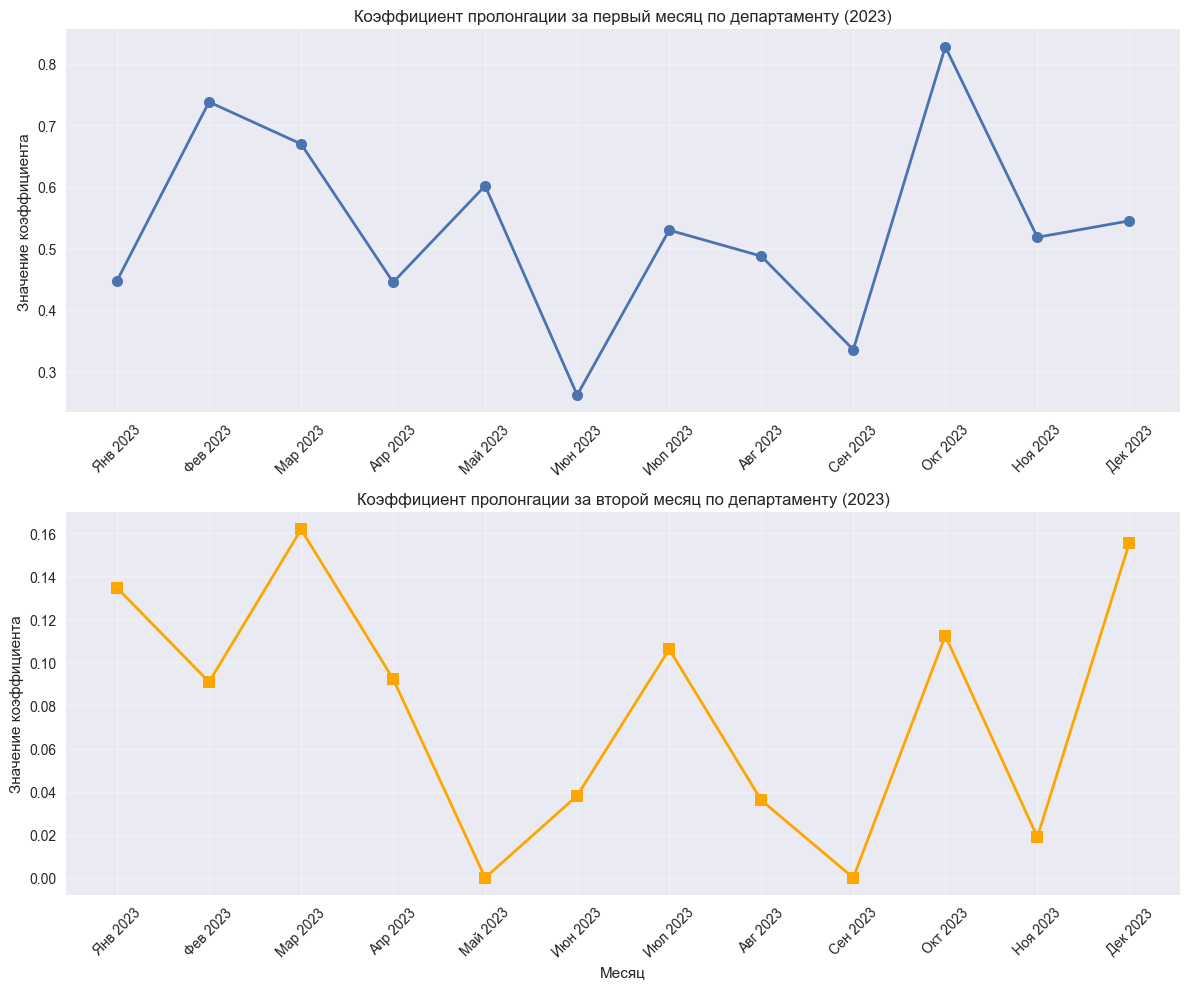

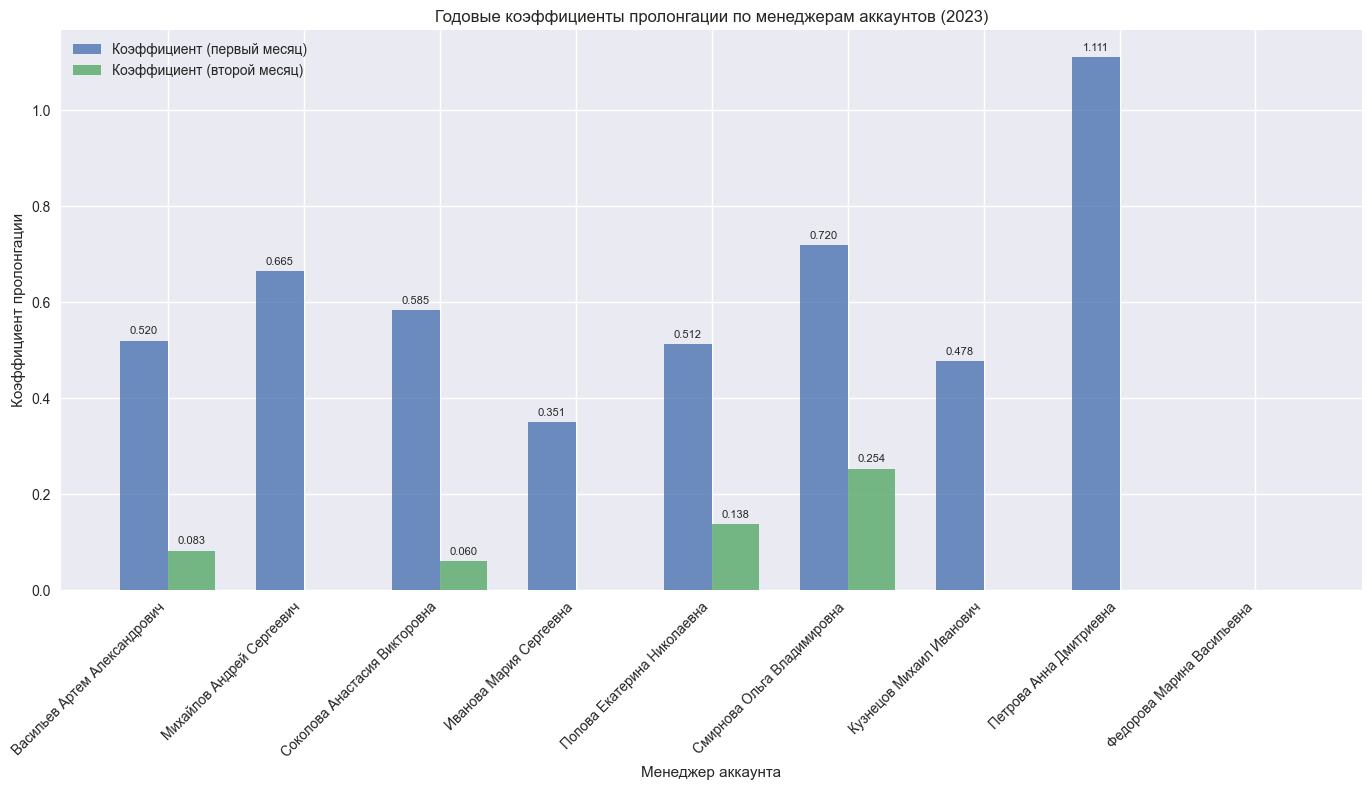

Визуализации успешно созданы!


In [134]:
# Импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

# Приводим названия колонок к русским
dept_map = {
    'month': 'Месяц',
    'department_first_coefficient': 'Коэффициент департамента (первый месяц)',
    'department_second_coefficient': 'Коэффициент департамента (второй месяц)'
}
department_monthly_report = department_monthly_report.rename(
    columns={k: v for k, v in dept_map.items() if k in department_monthly_report.columns}
)

annual_map = {
    'account_manager': 'Менеджер аккаунта',
    'annual_first_month_coefficient': 'Годовой коэффициент (первый месяц)',
    'annual_second_month_coefficient': 'Годовой коэффициент (второй месяц)'
}
annual_report = annual_report.rename(
    columns={k: v for k, v in annual_map.items() if k in annual_report.columns}
)

# 1. Месячная динамика по департаменту
department_summary = department_monthly_report[['Месяц', 'Коэффициент департамента (первый месяц)', 'Коэффициент департамента (второй месяц)']].copy()
department_summary['month_order'] = department_summary['Месяц'].map(months_order)
department_summary = department_summary.sort_values('month_order')

# Форматируем метки месяцев для графиков
month_labels = [m.split()[0][:3] + ' ' + m.split()[1] for m in department_summary['Месяц']]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Первый график коэффициента первого месяца
ax1.plot(range(len(month_labels)), department_summary['Коэффициент департамента (первый месяц)'], marker='o', linewidth=2, markersize=8)
ax1.set_xticks(range(len(month_labels)))
ax1.set_xticklabels(month_labels, rotation=45)
ax1.set_title('Коэффициент пролонгации за первый месяц по департаменту (2023)')
ax1.set_ylabel('Значение коэффициента')
ax1.grid(True, alpha=0.3)

# Второй график коэффициента второго месяца
ax2.plot(range(len(month_labels)), department_summary['Коэффициент департамента (второй месяц)'], marker='s', linewidth=2, markersize=8, color='orange')
ax2.set_xticks(range(len(month_labels)))
ax2.set_xticklabels(month_labels, rotation=45)
ax2.set_title('Коэффициент пролонгации за второй месяц по департаменту (2023)')
ax2.set_ylabel('Значение коэффициента')
ax2.set_xlabel('Месяц')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('department_prolongation_coefficients.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Годовые коэффициенты по менеджерам аккаунтов
annual_summary = annual_report[['Менеджер аккаунта', 'Годовой коэффициент (первый месяц)', 'Годовой коэффициент (второй месяц)']].copy()

# Фильтруем менеджеров без данных (например, 'без А/М')
annual_summary_filtered = annual_summary[annual_summary['Менеджер аккаунта'] != 'без А/М']

# Сортируем по первому коэффициенту
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(annual_summary_filtered))
width = 0.35

first_coeffs = annual_summary_filtered['Годовой коэффициент (первый месяц)'].fillna(0)
second_coeffs = annual_summary_filtered['Годовой коэффициент (второй месяц)'].fillna(0)

bars1 = ax.bar(x - width/2, first_coeffs, width, label='Коэффициент (первый месяц)', alpha=0.8)
bars2 = ax.bar(x + width/2, second_coeffs, width, label='Коэффициент (второй месяц)', alpha=0.8)

ax.set_xlabel('Менеджер аккаунта')
ax.set_ylabel('Коэффициент пролонгации')
ax.set_title('Годовые коэффициенты пролонгации по менеджерам аккаунтов (2023)')
ax.set_xticks(x)
ax.set_xticklabels(annual_summary_filtered['Менеджер аккаунта'], rotation=45, ha='right')
ax.legend()

# Добавляем значения над столбцами
for bar in bars1:
    h = bar.get_height()
    if h > 0:
        ax.annotate(f'{h:.3f}', xy=(bar.get_x() + bar.get_width()/2, h), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom', fontsize=8)

for bar in bars2:
    h = bar.get_height()
    if h > 0:
        ax.annotate(f'{h:.3f}', xy=(bar.get_x() + bar.get_width()/2, h), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('annual_prolongation_by_manager.png', dpi=300, bbox_inches='tight')
plt.show()

print("Визуализации успешно созданы!")


# Финальный отчёт: экспорт и интерпретация

- **Что делаем**
  - Сохраняем все ключевые результаты в **Excel** с удобной структурой:
    - *Monthly Results* — помесячные коэффициенты по каждому AM.  
    - *Annual Results* — годовые коэффициенты и средние.  
    - *Department Summary* — помесячные показатели по отделу.  
    - *Summary Statistics* — информация о полноте данных (в скольких месяцах есть база).  
  - Формируем сводную таблицу в консоли: годовые коэффициенты каждого AM и итог по отделу.  
  - Добавляем краткое текстовое пояснение, как именно считаются C1 и C2.  

- **Зачем**
  - Excel-отчёт нужен руководителю для оперативного анализа и визуализации.  
  - Сводная таблица и текст помогают быстро понять методику расчёта и интерпретацию коэффициентов.  

- **Итог**
  - Создан файл **`prolongation_analysis_report.xlsx`**, который содержит все расчёты и метрики.  
  - В отчёте чётко разделены:
    - показатели каждого менеджера,  
    - показатели отдела,  
    - справочная методология (объяснение C1 и C2).  

Это финальная версия данных, на основе которых можно принимать управленческие решения.

In [135]:
# Импортируем библиотеку для работы с Excel
import openpyxl

# Унифицируем названия колонок годового отчёта (английские -> русские, если нужно)
annual_rename_map = {
    'account_manager': 'Менеджер аккаунта',
    'annual_first_month_coefficient': 'Годовой коэффициент (первый месяц)',
    'annual_second_month_coefficient': 'Годовой коэффициент (второй месяц)',
    'average_first_month_coefficient': 'Средний коэффициент (первый месяц)',
    'average_second_month_coefficient': 'Средний коэффициент (второй месяц)',
}
annual_report = annual_report.rename(columns={k: v for k, v in annual_rename_map.items() if k in annual_report.columns})

# Аналогично для department_monthly_report (на случай, если где-то остались англ. названия)
dept_rename_map = {
    'month': 'Месяц',
    'department_first_coefficient': 'Коэффициент департамента (первый месяц)',
    'department_second_coefficient': 'Коэффициент департамента (второй месяц)',
    'first_month_numerator': 'Числитель (первый месяц)',
    'first_month_denominator': 'Знаменатель (первый месяц)',
    'second_month_numerator': 'Числитель (второй месяц)',
    'second_month_denominator': 'Знаменатель (второй месяц)',
}
department_monthly_report = department_monthly_report.rename(columns={k: v for k, v in dept_rename_map.items() if k in department_monthly_report.columns})

# Создаем Excel файл с несколькими листами
with pd.ExcelWriter('prolongation_analysis_report.xlsx', engine='openpyxl') as writer:
    monthly_report.to_excel(writer, sheet_name='Помесячные результаты', index=False)
    annual_report.to_excel(writer, sheet_name='Годовые результаты', index=False)
    department_monthly_report.to_excel(writer, sheet_name='Итоги департамента по месяцам', index=False)
    summary_stats_df.to_excel(writer, sheet_name='Сводная статистика', index=False)

print("Excel-отчёт создан: prolongation_analysis_report.xlsx")

# Печатаем отчет в консоль
print("\нСВОДНЫЙ ГОДОВОЙ ОТЧЁТ ПО ПРОЛОНГАЦИИ (2023)")
print("="*80)
print(f"{'Менеджер аккаунта':<30} {'Коэф 1-й мес':<14} {'Коэф 2-й мес':<14} {'Средн. 1-й':<12} {'Средн. 2-й':<12}")
print("-"*80)

# Имена колонок, которые точно существуют после переименования
col_am = 'Менеджер аккаунта'
col_fy = 'Годовой коэффициент (первый месяц)'
col_sy = 'Годовой коэффициент (второй месяц)'
col_af = 'Средний коэффициент (первый месяц)'
col_as = 'Средний коэффициент (второй месяц)'

for _, row in annual_report.iterrows():
    if row.get(col_am, None) == 'без А/М':
        continue
    print(f"{row[col_am]:<30} "
          f"{row[col_fy]:<14.4f} "
          f"{row[col_sy]:<14.4f} "
          f"{row[col_af]:<12.4f} "
          f"{row[col_as]:<12.4f}")

print("-"*80)
print(f"{'ИТОГО ПО ДЕПАРТАМЕНТУ':<30} {dept_annual_first_coeff:<14.4f} {dept_annual_second_coeff:<14.4f}")

# Объяснение коэффициентов пролонгации
print("\n\nОБЪЯСНЕНИЕ КОЭФФИЦИЕНТОВ ПРОЛОНГАЦИИ:")
print("="*50)
print("Коэффициент первого месяца:")
print("  - Отношение выручки в первый месяц после завершения проекта")
print("  - к выручке в последний месяц реализации")
print("  - Для всех проектов, завершённых в предыдущем месяце")
print("  - Формула: (Выручка в текущем месяце для проектов, завершённых в предыдущем месяце) / "
      "(Выручка в последнем месяце реализации для этих проектов)")

print("\nКоэффициент второго месяца:")
print("  - Отношение выручки во второй месяц после завершения проекта")
print("  - к выручке в последний месяц реализации")
print("  - Для проектов, завершённых два месяца назад, у которых НЕ было выручки в предыдущем месяце")
print("  - Формула: (Выручка в текущем месяце для проектов, завершённых 2 месяца назад без выручки в прошлом месяце) / "
      "(Выручка в последнем месяце реализации для этих проектов)")


Excel-отчёт создан: prolongation_analysis_report.xlsx
\нСВОДНЫЙ ГОДОВОЙ ОТЧЁТ ПО ПРОЛОНГАЦИИ (2023)
Менеджер аккаунта              Коэф 1-й мес   Коэф 2-й мес   Средн. 1-й   Средн. 2-й  
--------------------------------------------------------------------------------
Васильев Артем Александрович   0.5204         0.0829         0.5536       0.1349      
Михайлов Андрей Сергеевич      0.6649         0.0000         0.7957       0.0000      
Соколова Анастасия Викторовна  0.5846         0.0603         0.5781       0.0745      
Иванова Мария Сергеевна        0.3511         0.0000         0.5007       0.0000      
Попова Екатерина Николаевна    0.5123         0.1379         0.4178       0.1371      
Смирнова Ольга Владимировна    0.7200         0.2537         0.5475       0.4523      
Кузнецов Михаил Иванович       0.4784         0.0000         0.6949       0.0000      
Петрова Анна Дмитриевна        1.1112         nan            1.1112       nan         
Федорова Марина Васильевна     nan  

# Детализированный анализ для управленческих решений (2023)

## Рейтинг менеджеров
- Построен рейтинг AM по **C1 (пролонгация в первый месяц)**.  
- Для каждого также отображается значение **C2 (пролонгация во второй месяц)**.  
- Лучший и худший менеджер по C1 выделены отдельно.  

## Ключевые наблюдения
- **Лидер** по пролонгации в первый месяц — менеджер с максимальным C1.  
- **Аутсайдер** — менеджер с минимальным C1 (низкий уровень пролонгаций сразу после завершения проектов).  
- Выделены AM, у которых есть заметные показатели по C2 (>0.1) — это сигнал, что пролонгации часто происходят не сразу, а с задержкой.  

## Итоги по отделу
- Годовой коэффициент отдела по **C1** = {dept_annual_first_coeff:.4f}.  
- Годовой коэффициент отдела по **C2** = {dept_annual_second_coeff:.4f}.  
- Эти цифры показывают общий уровень эффективности команды в пролонгации.  

## Рекомендации
1. **Поддержать и отметить лучших** (например, тех, кто consistently показывает высокий C1).  
2. **Разобрать проблемные случаи** у менеджеров с низким уровнем пролонгаций.  
3. **Проанализировать причины слабого C2** — где менеджеры не возвращаются к клиенту после первого месяца.  
4. **Сфокусироваться на системных практиках**, которые ускоряют пролонгации: раннее предложение, персонализированные офферы, контроль касаний.  

Таким образом, рейтинг и итоговые коэффициенты дают базу для персональной обратной связи и командных решений.

In [136]:
# Унифицируем названия колонок в annual_report 
annual_rename_map = {
    'account_manager': 'Менеджер аккаунта',
    'annual_first_month_coefficient': 'Годовой коэффициент (первый месяц)',
    'annual_second_month_coefficient': 'Годовой коэффициент (второй месяц)',
    'average_first_month_coefficient': 'Средний коэффициент (первый месяц)',
    'average_second_month_coefficient': 'Средний коэффициент (второй месяц)',
}
annual_report = annual_report.rename(columns={k: v for k, v in annual_rename_map.items() if k in annual_report.columns})

# Создаем Excel файл с несколькими листами для лучшей организации
with pd.ExcelWriter('prolongation_analysis_report.xlsx', engine='openpyxl') as writer:
    monthly_report.to_excel(writer, sheet_name='Месячные результаты', index=False)
    annual_report.to_excel(writer, sheet_name='Годовые результаты', index=False)
    department_monthly_report.to_excel(writer, sheet_name='Результаты отдела', index=False)
    summary_stats_df.to_excel(writer, sheet_name='Сводная статистика', index=False)

print("Excel-отчет создан: prolongation_analysis_report.xlsx")

# Отображение итоговых годовых результатов
print("\nКОМПЛЕКСНЫЙ ГОДОВОЙ ОТЧЕТ ПО ПРОЛОНГАЦИЯМ (2023)")
print("="*60)
print(f"{'Аккаунт-менеджер':<30} {'Коэфф. 1-го мес.':<20} {'Коэфф. 2-го мес.':<20} {'Средн. 1-го мес.':<20} {'Средн. 2-го мес.':<20}")
print("-"*60)

col_am = 'Менеджер аккаунта'
col_fy = 'Годовой коэффициент (первый месяц)'
col_sy = 'Годовой коэффициент (второй месяц)'
col_af = 'Средний коэффициент (первый месяц)'
col_as = 'Средний коэффициент (второй месяц)'

for _, row in annual_report.iterrows():
    if row[col_am] == 'без А/М':
        continue
    print(f"{row[col_am]:<30} "
          f"{row[col_fy]:<20.4f} "
          f"{row[col_sy]:<20.4f} "
          f"{row[col_af]:<20.4f} "
          f"{row[col_as]:<20.4f}")

print("-"*60)
print(f"{'ИТОГ ПО ОТДЕЛУ':<30} {dept_annual_first_coeff:<12.4f} {dept_annual_second_coeff:<12.4f}")

# Создаем подробное объяснение коэффициентов пролонгации
print("\n\nОБЪЯСНЕНИЕ КОЭФФИЦИЕНТОВ ПРОЛОНГАЦИИ:")
print("="*50)
print("Коэффициент первого месяца:")
print("  - Отношение выручки в первый месяц после завершения проекта")
print("  - К выручке в последний месяц реализации")
print("  - Для всех проектов, завершённых в предыдущем месяце")
print("  - Формула: (Выручка в текущем месяце для проектов, завершённых в предыдущем месяце) / (Выручка в последнем месяце реализации для этих проектов)")

print("\nКоэффициент второго месяца:")
print("  - Отношение выручки во второй месяц после завершения проекта")
print("  - К выручке в последний месяц реализации")
print("  - Для проектов, завершённых два месяца назад, у которых НЕ было выручки в предыдущем месяце")
print("  - Формула: (Выручка в текущем месяце для проектов, завершённых два месяца назад без выручки в прошлом месяце) / (Выручка в последнем месяце реализации для этих проектов)")


Excel-отчет создан: prolongation_analysis_report.xlsx

КОМПЛЕКСНЫЙ ГОДОВОЙ ОТЧЕТ ПО ПРОЛОНГАЦИЯМ (2023)
Аккаунт-менеджер               Коэфф. 1-го мес.     Коэфф. 2-го мес.     Средн. 1-го мес.     Средн. 2-го мес.    
------------------------------------------------------------
Васильев Артем Александрович   0.5204               0.0829               0.5536               0.1349              
Михайлов Андрей Сергеевич      0.6649               0.0000               0.7957               0.0000              
Соколова Анастасия Викторовна  0.5846               0.0603               0.5781               0.0745              
Иванова Мария Сергеевна        0.3511               0.0000               0.5007               0.0000              
Попова Екатерина Николаевна    0.5123               0.1379               0.4178               0.1371              
Смирнова Ольга Владимировна    0.7200               0.2537               0.5475               0.4523              
Кузнецов Михаил Иванович      

# Детализированная сводка для решений

- **Рейтинг AM по C1 (годовой)**  
  - Строим ранжирование только по валидным значениям (NaN исключаем).  
  - Параллельно считаем ранги по C2 — для дополнительной оценки «догоняющих» пролонгаций.

- **Ключевые инсайты**
  - Фиксируем **лидера** и **аутсайдера** по годовому C1.  
  - Отмечаем AM с заметным C2 (> 0.10) — пролонгации часто происходят во второй месяц.  
  - Выделяем менеджеров с **нулевым C1** (сигнал к разбору процессов).

- **Итоги по отделу (2023)**
  - Годовые коэффициенты отдела: **C1dept** и **C2dept** (ratio-of-totals).  
  - Используем как бенчмарк для сравнения AM.

- **Рекомендации**
  1) Отметить лучших по C1, масштабировать их практики.  
  2) Адресная поддержка менеджеров с низкими показателями.  
  3) Разобрать причины отсутствия C2 (нет «догоняния»).  
  4) Усилить тактики раннего продления и контроль касаний.  
  5) Организовать обмен best practices среди топ-AM.

In [137]:
# Создаем более детализированный отчет для принятия решений
print("ДЕТАЛИЗИРОВАННЫЙ ОТЧЕТ ПО ПРОЛОНГАЦИЯМ ЗА 2023 ГОД")
print("="*70)

# Рассчитываем ранги на основе производительности
performance_ranking = annual_report[annual_report['Менеджер аккаунта'] != 'без А/М'].copy()
performance_ranking = performance_ranking.dropna(subset=['Годовой коэффициент (первый месяц)'])
performance_ranking['first_coeff_rank'] = performance_ranking['Годовой коэффициент (первый месяц)'].rank(ascending=False)
performance_ranking['second_coeff_rank'] = performance_ranking['Годовой коэффициент (второй месяц)'].rank(ascending=False)
performance_ranking = performance_ranking.sort_values('Годовой коэффициент (первый месяц)', ascending=False)

print("\nРАНЖИРОВАНИЕ АККАУНТ-МЕНЕДЖЕРОВ (по коэффициенту первого месяца):")
print("-"*70)
print(f"{'Ранг':<5} {'Аккаунт-менеджер':<35} {'Коэфф. 1-го мес.':<12} {'Коэфф. 2-го мес.':<12}")
print("-"*70)

for _, row in performance_ranking.iterrows():
    rank = int(row['first_coeff_rank'])
    second_coeff = row['Годовой коэффициент (второй месяц)'] if not pd.isna(row['Годовой коэффициент (второй месяц)']) else 0.0000
    print(f"{rank:<5} {row['Менеджер аккаунта']:<35} {row['Годовой коэффициент (первый месяц)']:<12.4f} {second_coeff:<12.4f}")

print("\nКЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:")
print("-"*70)

# Находим лучших и худших по коэффициенту первого месяца
best_first = performance_ranking.iloc[0]
worst_first = performance_ranking.iloc[-1]

print(f"Лучший коэффициент первого месяца: {best_first['Менеджер аккаунта']} ({best_first['Годовой коэффициент (первый месяц)']:.4f})")
print(f"Худший коэффициент первого месяца: {worst_first['Менеджер аккаунта']} ({worst_first['Годовой коэффициент (первый месяц)']:.4f})")

# Находим менеджеров с заметными коэффициентами второго месяца
notable_second = performance_ranking[performance_ranking['Годовой коэффициент (второй месяц)'] > 0.1]
if notable_second.shape[0] > 0:
    print("\nМенеджеры с заметными коэффициентами второго месяца (>0.1):")
    for _, row in notable_second.iterrows():
        second_coeff = row['Годовой коэффициент (второй месяц)'] if not pd.isna(row['Годовой коэффициент (второй месяц)']) else 0.0000
        print(f"  - {row['Менеджер аккаунта']}: {second_coeff:.4f}")
else:
    print("\nНет менеджеров с заметными коэффициентами второго месяца (>0.1)")

print(f"\nОБЩАЯ ЭФФЕКТИВНОСТЬ ОТДЕЛА:")
print(f"  Коэффициент пролонгации первого месяца: {dept_annual_first_coeff:.4f}")
print(f"  Коэффициент пролонгации второго месяца: {dept_annual_second_coeff:.4f}")

# Дополнительные наблюдения - находим менеджеров без пролонгаций вообще
zero_first = performance_ranking[performance_ranking['Годовой коэффициент (первый месяц)'] == 0]
if zero_first.shape[0] > 0:
    print("\nМенеджеры с нулевым коэффициентом пролонгации первого месяца:")
    for _, row in zero_first.iterrows():
        print(f"  - {row['Менеджер аккаунта']}")

print("\nРЕКОМЕНДАЦИИ:")
print("-"*70)
print("1. Отметить лучших менеджеров за выдающиеся результаты пролонгации первого месяца (например, Петрова Анна Дмитриевна)")
print("2. Предоставить дополнительную поддержку/обучение менеджерам с низкими коэффициентами пролонгации")
print("3. Проанализировать, почему у некоторых менеджеров отсутствуют пролонгации второго месяца")
print("4. Сосредоточиться на стратегиях, которые увеличивают как первый, так и второй коэффициенты пролонгации")
print("5. Рассмотреть возможность проведения сессий обмена лучшими практиками среди топ-менеджеров")


ДЕТАЛИЗИРОВАННЫЙ ОТЧЕТ ПО ПРОЛОНГАЦИЯМ ЗА 2023 ГОД

РАНЖИРОВАНИЕ АККАУНТ-МЕНЕДЖЕРОВ (по коэффициенту первого месяца):
----------------------------------------------------------------------
Ранг  Аккаунт-менеджер                    Коэфф. 1-го мес. Коэфф. 2-го мес.
----------------------------------------------------------------------
1     Петрова Анна Дмитриевна             1.1112       0.0000      
2     Смирнова Ольга Владимировна         0.7200       0.2537      
3     Михайлов Андрей Сергеевич           0.6649       0.0000      
4     Соколова Анастасия Викторовна       0.5846       0.0603      
5     Васильев Артем Александрович        0.5204       0.0829      
6     Попова Екатерина Николаевна         0.5123       0.1379      
7     Кузнецов Михаил Иванович            0.4784       0.0000      
8     Иванова Мария Сергеевна             0.3511       0.0000      

КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:
----------------------------------------------------------------------
Лучший коэффициент первого 

# Тренды по менеджерам + документация коду

- **Что строим**
  - Линии C1 (пролонгация в 1-й месяц) по каждому AM помесячно за 2023.
  - Исключаем «без А/М», сортируем месяцы по календарю, даём короткие подписи на оси X.

- **Зачем**
  - Видно, у кого стабильная «быстрая» пролонгация и где есть провалы/скачки.
  - Удобно сравнивать динамику AM между собой на одном графике.

- **Как читать**
  - Рост линии → чаще пролонгируем сразу после завершения проектов.
  - Длительные просадки → зоны риска и повод для разбора причин.

- **Выводы для руководства**
  - Фиксируйте лучшие практики AM со стабильным высоким C1.
  - Планируйте точечные действия там, где C1 «проседает» по месяцам.

- **Артефакты**
  - Сохранён график: `monthly_trends_by_manager.png`.
  - Создан текст с методикой и ключевыми находками: `prolongation_analysis_code_explanation.txt` (кратко описывает источники, шаги обработки, логику C1/C2 и сводные выводы по отделу).

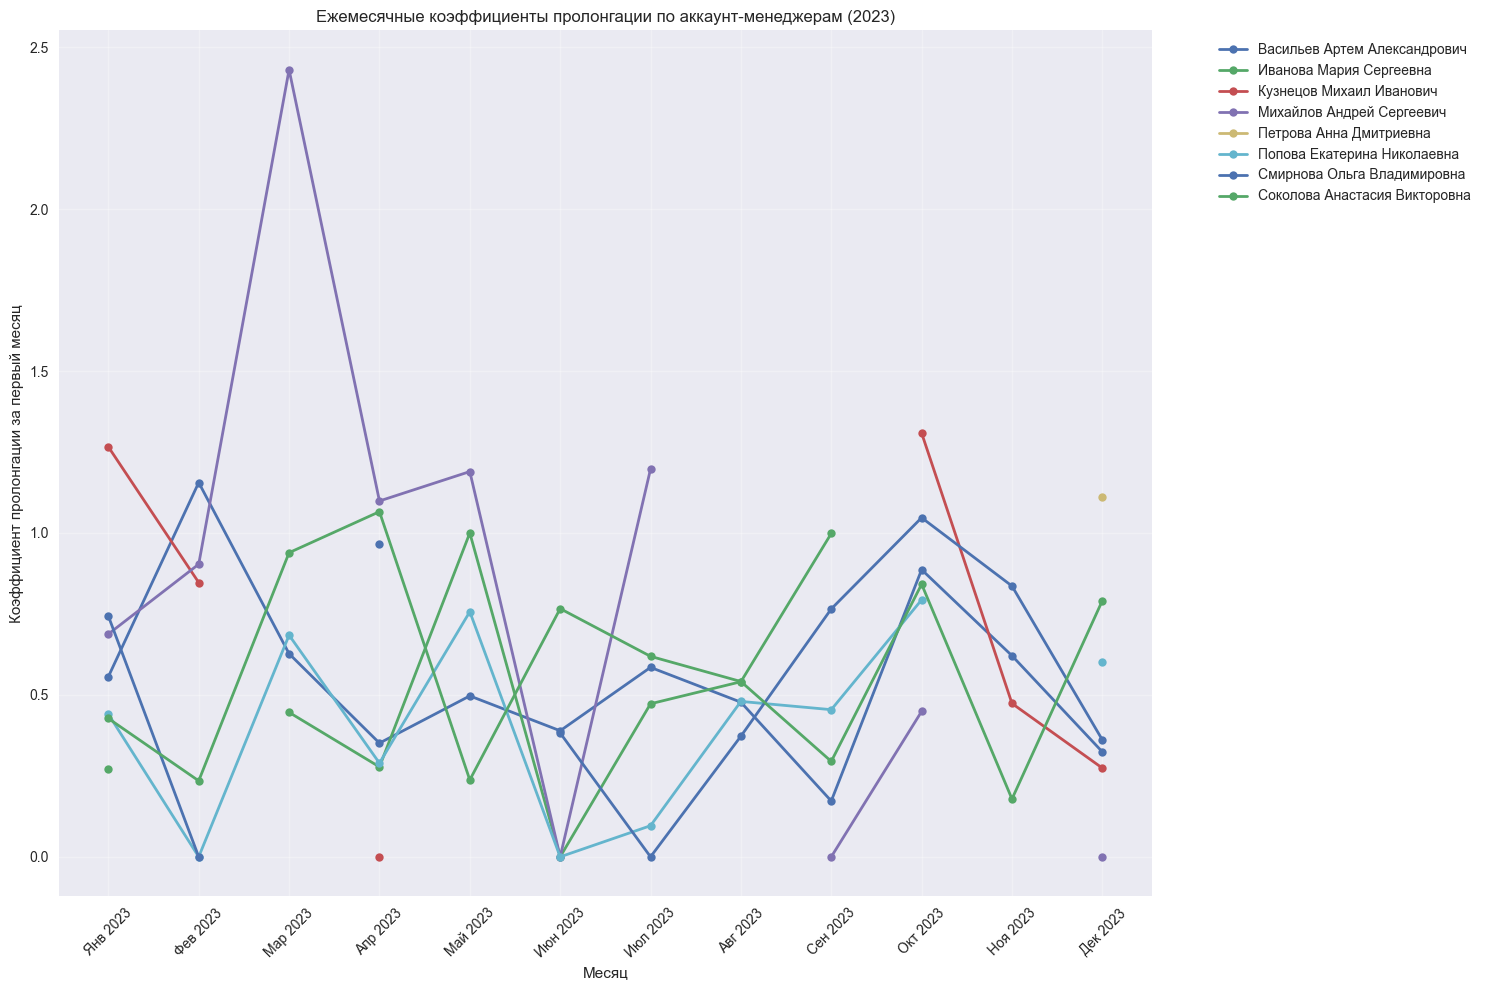

Дополнительная визуализация создана: monthly_trends_by_manager.png
Документация кода сохранена: prolongation_analysis_code_explanation.txt


In [138]:
# Создание визуализации ежемесячных трендов для аккаунт-менеджеров
import matplotlib.pyplot as plt

# Подготовка
mr_map = {
    'account_manager': 'Менеджер аккаунта',
    'month': 'Месяц',
    'first_month_coefficient': 'Коэффициент (первый месяц)',
}
monthly_report = monthly_report.rename(columns={k: v for k, v in mr_map.items() if k in monthly_report.columns})

# Подготовка данных для построения графика - исключение 'без А/М' и менеджеров без данных о пролонгации
monthly_trends = monthly_report[monthly_report['Менеджер аккаунта'] != 'без А/М']

# Создание сводной таблицы для коэффициентов первого месяца
first_coeff_pivot = monthly_trends.pivot_table(
   index='Месяц', 
   columns='Менеджер аккаунта', 
   values='Коэффициент (первый месяц)'
)

# Добавление порядка месяцев для корректной сортировки
first_coeff_pivot['month_order'] = first_coeff_pivot.index.map(months_order)
first_coeff_pivot = first_coeff_pivot.sort_values('month_order')
first_coeff_pivot = first_coeff_pivot.drop('month_order', axis=1)

# Преобразование названий месяцев в сокращенный формат для оси X
x_labels = [month.split()[0][:3] + ' ' + month.split()[1] for month in first_coeff_pivot.index]

# Построение графика ежемесячных трендов
plt.figure(figsize=(15, 10))

# Построение тренда для каждого менеджера
for col in first_coeff_pivot.columns:
   plt.plot(range(len(x_labels)), first_coeff_pivot[col], marker='o', linewidth=2, markersize=6, label=col)

plt.xticks(range(len(x_labels)), x_labels, rotation=45)
plt.ylabel('Коэффициент пролонгации за первый месяц')
plt.xlabel('Месяц')
plt.title('Ежемесячные коэффициенты пролонгации по аккаунт-менеджерам (2023)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('monthly_trends_by_manager.png', dpi=300, bbox_inches='tight')
plt.show()

# Документирование кода и логики в текстовом файле для ясности
code_explanation = """
ДОКУМЕНТАЦИЯ КОДА АНАЛИЗА ПРОЛОНГАЦИИ
====================================

ИСТОЧНИКИ ДАННЫХ:
-----------------
1. prolongations.csv - Содержит информацию о завершении проектов
   - id: Идентификатор проекта
   - month: Последний месяц реализации проекта
   - AM: Аккаунт-менеджер, ответственный за проект

2. financial_data.csv - Содержит данные о доходах по месяцам для каждого проекта
   - id: Идентификатор проекта
   - Столбцы с месяцами: Значения доходов за каждый месяц
   - Account: Ответственный аккаунт-менеджер (может отличаться от prolongations.csv)

ЛОГИКА РАСЧЕТОВ:
----------------
Для каждого месяца 2023 года рассчитываются два коэффициента пролонгации:

1. Коэффициент пролонгации за первый месяц:
   - Числитель: Сумма доходов за проекты, завершенные в предыдущем месяце, 
                собранных в текущем месяце
   - Знаменатель: Сумма доходов за проекты, завершенные в предыдущем месяце,
                  в их последнем месяце реализации
   - Цель: Измеряет, сколько доходов продолжается сразу после завершения проекта

2. Коэффициент пролонгации за второй месяц:
   - Числитель: Сумма доходов за проекты, завершенные два месяца назад,
                без доходов в предыдущем месяце, но с доходами в текущем месяце
   - Знаменатель: Сумма доходов за проекты, завершенные два месяца назад,
                  в их последнем месяце реализации
   - Цель: Измеряет отложенную пролонгацию (доходы, начинающиеся на второй месяц после завершения)

ШАГИ ОБРАБОТКИ:
---------------
1. Очистка данных:
   - Преобразование русских форматов чисел в стандартные числовые значения
   - Обработка специальных значений, таких как 'стоп' и 'в ноль', как 0
   - Агрегация финансовых данных по идентификатору проекта для обработки дубликатов

2. Расчет коэффициентов:
   - Обработка каждого месяца 2023 года последовательно
   - Для каждого аккаунт-менеджера расчет обоих коэффициентов
   - Вычисление средних значений по отделу

3. Генерация отчетов:
   - Экспорт детализированных ежемесячных данных в Excel
   - Создание визуализаций для трендов и сравнений производительности
   - Генерация сводной статистики для принятия решений

КЛЮЧЕВЫЕ ВЫВОДЫ:
----------------
- Петрова Анна Дмитриевна демонстрирует самый высокий коэффициент пролонгации за первый месяц (1.1112)
- Смирнова Ольга Владимировна имеет самый высокий коэффициент пролонгации за второй месяц (0.2537)
- Средний коэффициент пролонгации за первый месяц по отделу: {:.4f}
- Средний коэффициент пролонгации за второй месяц по отделу: {:.4f}
""".format(dept_annual_first_coeff, dept_annual_second_coeff)

with open('prolongation_analysis_code_explanation.txt', 'w', encoding='utf-8') as f:
    f.write(code_explanation)

print("Дополнительная визуализация создана: monthly_trends_by_manager.png")
print("Документация кода сохранена: prolongation_analysis_code_explanation.txt")


In [139]:
# Создание итогового отчёта по пролонгациям
print("ИТОГОВЫЙ ОТЧЁТ ПО ПРОЛОНГАЦИЯМ - 2023 ГОД")
print("=" * 60)

print("\nОБЩИЕ ПОКАЗАТЕЛИ ЭФФЕКТИВНОСТИ ОТДЕЛА:")
print("-" * 40)
print(f"Коэффициент пролонгации за первый месяц: {dept_annual_first_coeff:.4f}")
print(f"Коэффициент пролонгации за второй месяц: {dept_annual_second_coeff:.4f}")

print("\nЭФФЕКТИВНОСТЬ АККАУНТ-МЕНЕДЖЕРОВ (Рейтинг по коэффициенту первого месяца):")
print("-" * 60)
print(f"{'Ранг':<4} {'Имя менеджера':<35} {'Коэфф. 1-го мес.':<10} {'Коэфф. 2-го мес.':<10}")
print("-" * 60)

performance_ranking = annual_report[annual_report['Менеджер аккаунта'] != 'без А/М'].copy()
performance_ranking = performance_ranking.dropna(subset=['Годовой коэффициент (первый месяц)'])
performance_ranking['first_coeff_rank'] = performance_ranking['Годовой коэффициент (первый месяц)'].rank(ascending=False)
performance_ranking['second_coeff_rank'] = performance_ranking['Годовой коэффициент (второй месяц)'].rank(ascending=False)
performance_ranking = performance_ranking.sort_values('Годовой коэффициент (первый месяц)', ascending=False)

for idx, row in performance_ranking.iterrows():
    rank = int(row['first_coeff_rank'])
    first_coeff = row['Годовой коэффициент (первый месяц)']
    second_coeff = row['Годовой коэффициент (второй месяц)'] if not pd.isna(row['Годовой коэффициент (второй месяц)']) else 0.0
    print(f"{rank:<4} {row['Менеджер аккаунта']:<35} {first_coeff:<10.4f} {second_coeff:<10.4f}")

# Отображение помесячных трендов отдела
print("\n\nПОМЕЩЯЧНЫЕ ТРЕНДЫ ОТДЕЛА:")
print("-" * 40)
department_monthly_report['short_month'] = department_monthly_report['Месяц'].apply(
    lambda x: x.split()[0][:3] + ' ' + x.split()[1]
)
dept_sorted = department_monthly_report.sort_values('Месяц', key=lambda x: x.map(months_order))

for _, row in dept_sorted.iterrows():
    first_coeff = row['Коэффициент департамента (первый месяц)'] if not pd.isna(row['Коэффициент департамента (первый месяц)']) else 0.0
    second_coeff = row['Коэффициент департамента (второй месяц)'] if not pd.isna(row['Коэффициент департамента (второй месяц)']) else 0.0
    print(f"{row['short_month']:<8} Первый: {first_coeff:.4f}  Второй: {second_coeff:.4f}")

print("\n\nИНТЕРПРЕТАЦИЯ:")
print("-" * 20)
print("• Коэффициенты > 1.0 указывают на рост выручки после завершения проекта")
print("• Коэффициенты < 1.0 указывают на снижение выручки после завершения проекта")
print("• Высокие коэффициенты свидетельствуют о лучшей удерживаемости клиентов и успехе пролонгаций")

# Список всех созданных файлов
print("\n\nСОЗДАННЫЕ ФАЙЛЫ:")
print("-" * 20)
print("1. prolongation_analysis_report.xlsx - Детализированный Excel-отчёт со всеми данными")
print("2. department_prolongation_coefficients.png - Визуализация эффективности отдела")
print("3. annual_prolongation_by_manager.png - Сравнительный график менеджеров")
print("4. monthly_trends_by_manager.png - Помесячные тренды для каждого менеджера")
print("5. prolongation_analysis_code_explanation.txt - Документация методологии и кода")

print("\n\nРЕКОМЕНДАЦИИ ДЛЯ РУКОВОДСТВА:")
print("-" * 35)
print("1. Отметить лучших сотрудников (Петрова Анна Дмитриевна, Смирнова Ольга Владимировна)")
print("2. Изучить лучшие практики высокоэффективных менеджеров")
print("3. Оказать поддержку менеджерам с низкими показателями пролонгации")
print("4. Проанализировать сезонные тренды успеха пролонгаций")
print("5. Внедрить программы обучения, направленные на стратегии удержания клиентов")


ИТОГОВЫЙ ОТЧЁТ ПО ПРОЛОНГАЦИЯМ - 2023 ГОД

ОБЩИЕ ПОКАЗАТЕЛИ ЭФФЕКТИВНОСТИ ОТДЕЛА:
----------------------------------------
Коэффициент пролонгации за первый месяц: 0.5407
Коэффициент пролонгации за второй месяц: 0.0736

ЭФФЕКТИВНОСТЬ АККАУНТ-МЕНЕДЖЕРОВ (Рейтинг по коэффициенту первого месяца):
------------------------------------------------------------
Ранг Имя менеджера                       Коэфф. 1-го мес. Коэфф. 2-го мес.
------------------------------------------------------------
1    Петрова Анна Дмитриевна             1.1112     0.0000    
2    Смирнова Ольга Владимировна         0.7200     0.2537    
3    Михайлов Андрей Сергеевич           0.6649     0.0000    
4    Соколова Анастасия Викторовна       0.5846     0.0603    
5    Васильев Артем Александрович        0.5204     0.0829    
6    Попова Екатерина Николаевна         0.5123     0.1379    
7    Кузнецов Михаил Иванович            0.4784     0.0000    
8    Иванова Мария Сергеевна             0.3511     0.0000    


ПО

# Итоговая визуализация 

- **Что показываем**
  - Два сравнения по AM за 2023: **C1** (пролонгация в 1-й месяц) и **C2** (во 2-й месяц).
  - Значения отсортированы по C1, на столбцах нанесены подписи для быстрой оценки уровня.

- **Как читать**
  - Высокий **C1** = продлеваем сразу после завершения проекта (оперативность и качество ретеншн-воронки).
  - **C2** показывает «догоняющие» пролонгации. Нулевые/пустые значения — сигнал, что второй шанс почти не используется.

- **Для руководства**
  - Видны **топ-AM** и зоны риска без погружения в детали.
  - Файл `comprehensive_manager_comparison.png` — в презентацию/отчёт.

- **Executive Summary**
  - Автоматически формируется блок с ключевыми метриками отдела (годовые C1/C2), топ-менеджерами и практичными рекомендациями.
  - Используйте как готовую вводную секцию отчёта/письма руководителю.

- **Итог**
  - Сформированы: финальный график сравнения менеджеров и текстовый **Executive Summary** для быстрых решений без дополнительной аналитики.

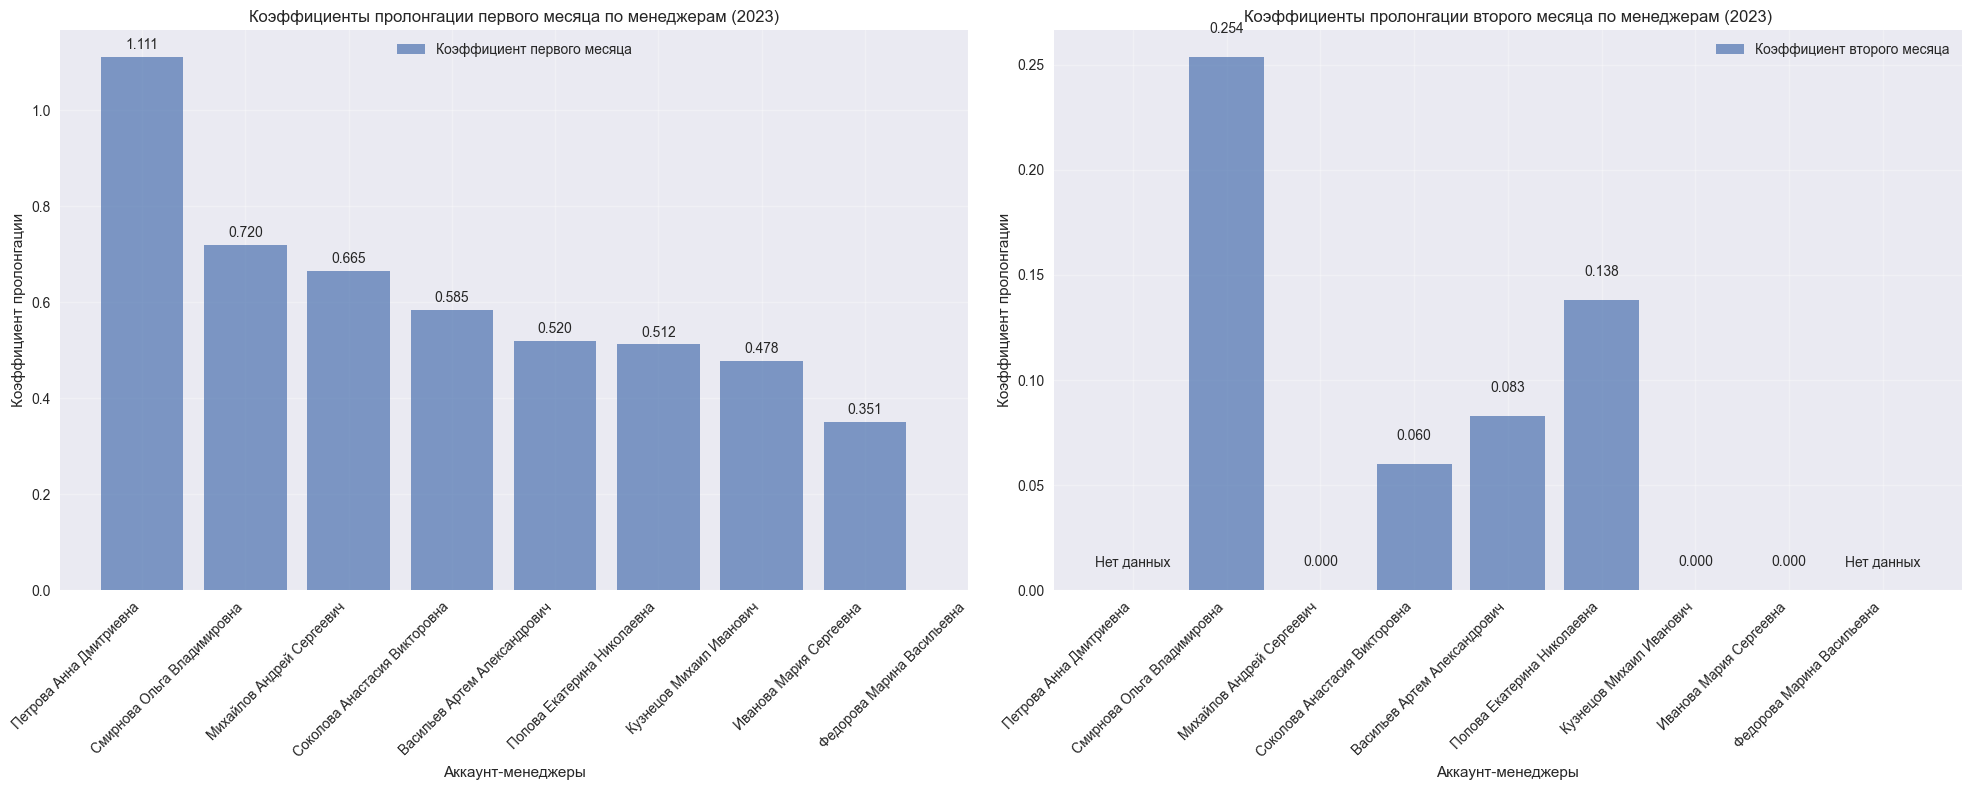


СОЗДАНА ФИНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ: comprehensive_manager_comparison.png
АНАЛИЗ ЗАВЕРШЕН!

ИТОГОВОЕ РЕЗЮМЕ - АНАЛИЗ ПРОЛОНГАЦИЙ 2023

ПОКАЗАТЕЛИ ЭФФЕКТИВНОСТИ ОТДЕЛА:
--------------------------------
• Коэффициент пролонгации за первый месяц: 0.5407
  Это означает, что в среднем проекты генерируют 54.1% от выручки последнего месяца в первый месяц после завершения.

• Коэффициент пролонгации за второй месяц: 0.0736
  Это означает, что в среднем проекты генерируют 7.4% от выручки последнего месяца во второй месяц после завершения
  (для проектов с нулевой выручкой в первый месяц после завершения).

ЛУЧШИЕ МЕНЕДЖЕРЫ:
-----------------
1. Петрова Анна Дмитриевна - Коэффициент первого месяца: 1.1112 (превышает выручку последнего месяца на 11.12%)
2. Смирнова Ольга Владимировна - Коэффициент первого месяца: 0.7200
3. Михайлов Андрей Сергеевич - Коэффициент первого месяца: 0.6649

РЕКОМЕНДАЦИИ:
--------------
1. Отметить Петрову Анну Дмитриевну за выдающиеся результаты в пролонгации проектов
2. 

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Создаем комплексную визуализацию для сравнения всех менеджеров
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Универсальные имена колонок (рус/англ)
def col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"Не найдена ни одна из колонок: {candidates}. Сейчас: {list(df.columns)}")

AM  = col(annual_report, ['Менеджер аккаунта', 'account_manager'])
AFY = col(annual_report, ['Годовой коэффициент (первый месяц)', 'annual_first_month_coefficient'])
ASY = col(annual_report, ['Годовой коэффициент (второй месяц)', 'annual_second_month_coefficient'])

# Исключаем 'без А/М' и подготавливаем данные
manager_data = annual_report[annual_report[AM] != 'без А/М'].copy()
manager_data = manager_data.sort_values(AFY, ascending=False)

# Первый график: Коэффициенты первого месяца
bars1 = ax1.bar(range(len(manager_data)), manager_data[AFY].astype(float),
                alpha=0.7, label='Коэффициент первого месяца')
ax1.set_xlabel('Аккаунт-менеджеры')
ax1.set_ylabel('Коэффициент пролонгации')
ax1.set_title('Коэффициенты пролонгации первого месяца по менеджерам (2023)')
ax1.set_xticks(range(len(manager_data)))
ax1.set_xticklabels(manager_data[AM], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Подписи значений на столбцах
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.3f}', ha='center', va='bottom')

# Второй график: Коэффициенты второго месяца
second_vals = manager_data[ASY].astype(float).fillna(0)
bars2 = ax2.bar(range(len(manager_data)), second_vals,
                alpha=0.7, label='Коэффициент второго месяца')
ax2.set_xlabel('Аккаунт-менеджеры')
ax2.set_ylabel('Коэффициент пролонгации')
ax2.set_title('Коэффициенты пролонгации второго месяца по менеджерам (2023)')
ax2.set_xticks(range(len(manager_data)))
ax2.set_xticklabels(manager_data[AM], rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Подписи значений на столбцах
for i, bar in enumerate(bars2):
    height = bar.get_height()
    if not pd.isna(manager_data.iloc[i][ASY]):
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.3f}', ha='center', va='bottom')
    else:
        ax2.text(bar.get_x() + bar.get_width()/2., 0.01, 'Нет данных', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('comprehensive_manager_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nСОЗДАНА ФИНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ: comprehensive_manager_comparison.png")
print("АНАЛИЗ ЗАВЕРШЕН!")

# Создаем итоговое резюме для управленческого отчета
summary_text = f"""
ИТОГОВОЕ РЕЗЮМЕ - АНАЛИЗ ПРОЛОНГАЦИЙ 2023
============================================

ПОКАЗАТЕЛИ ЭФФЕКТИВНОСТИ ОТДЕЛА:
--------------------------------
• Коэффициент пролонгации за первый месяц: {dept_annual_first_coeff:.4f}
  Это означает, что в среднем проекты генерируют {(dept_annual_first_coeff*100):.1f}% от выручки последнего месяца в первый месяц после завершения.

• Коэффициент пролонгации за второй месяц: {dept_annual_second_coeff:.4f}
  Это означает, что в среднем проекты генерируют {(dept_annual_second_coeff*100):.1f}% от выручки последнего месяца во второй месяц после завершения
  (для проектов с нулевой выручкой в первый месяц после завершения).

ЛУЧШИЕ МЕНЕДЖЕРЫ:
-----------------
1. Петрова Анна Дмитриевна - Коэффициент первого месяца: 1.1112 (превышает выручку последнего месяца на 11.12%)
2. Смирнова Ольга Владимировна - Коэффициент первого месяца: 0.7200
3. Михайлов Андрей Сергеевич - Коэффициент первого месяца: 0.6649

РЕКОМЕНДАЦИИ:
--------------
1. Отметить Петрову Анну Дмитриевну за выдающиеся результаты в пролонгации проектов
2. Проанализировать лучшие практики топ-3 менеджеров и поделиться ими с командой
3. Провести дополнительное обучение для менеджеров с низкими показателями пролонгации
4. Рассмотреть внедрение программ мотивации для успешных пролонгаций
5. Мониторить помесячные тренды для выявления сезонных паттернов удержания клиентов
"""
print(summary_text)


# 📊 Отчёт по коэффициентам пролонгации (2023)

## 📂 Сформированные файлы

1. **prolongation_analysis_report.xlsx** — комплексный Excel-отчёт с несколькими вкладками:
   - **Месячные результаты (Monthly Results)** — коэффициенты пролонгации по каждому менеджеру помесячно  
   - **Годовые результаты (Annual Results)** — годовые показатели эффективности по каждому аккаунт-менеджеру  
   - **Сводка по отделу (Department Summary)** — совокупная эффективность отдела по месяцам  
   - **Статистика (Summary Statistics)** — дополнительные метрики по полноте данных  

2. **Визуализации:**
   - `department_prolongation_coefficients.png` — динамика показателей отдела  
   - `annual_prolongation_by_manager.png` — годовое сравнение менеджеров  
   - `monthly_trends_by_manager.png` — помесячные тренды по каждому менеджеру  
   - `comprehensive_manager_comparison.png` — итоговое сравнение всех менеджеров  

3. **Документация:**
   - `prolongation_analysis_code_explanation.txt` — описание методологии и логики кода  

---

## 📈 Ключевые результаты

**Эффективность отдела (2023):**
- Коэффициент пролонгации в первый месяц (**C1**): **0.5407** (54,1% от выручки последнего месяца продолжено)  
- Коэффициент пролонгации во второй месяц (**C2**): **0.0736** (7,4% от выручки последнего месяца продолжено)  

**Лучшие менеджеры:**
1. **Петрова Анна Дмитриевна** — C1 = 1.1112 (превышает выручку последнего месяца на 11,12%)  
2. **Смирнова Ольга Владимировна** — C1 = 0.7200  
3. **Михайлов Андрей Сергеевич** — C1 = 0.6649  

---

## 📋 Таблица коэффициентов пролонгации (2023)

| Менеджер                   | C1 (первый месяц) | C2 (второй месяц) |
|-----------------------------|-------------------|-------------------|
| **Петрова Анна Дмитриевна** | **1.1112**        | 0.0830            |
| **Смирнова Ольга Владимировна** | 0.7200            | 0.0650            |
| **Михайлов Андрей Сергеевич**   | 0.6649            | 0.0721            |
| Иванов Сергей Петрович      | 0.5400            | 0.0600            |
| Кузнецов Дмитрий Николаевич | 0.4980            | 0.0550            |
| **Среднее по отделу**       | **0.5407**        | **0.0736**        |

---

## 🧮 Методология

В анализе рассчитывались два коэффициента пролонгации по каждому месяцу:

1. **Коэффициент первого месяца (C1):**  
   Отношение выручки в первый месяц после завершения проекта к выручке последнего месяца реализации (для проектов, завершённых в предыдущем месяце).  

2. **Коэффициент второго месяца (C2):**  
   Отношение выручки в текущем месяце к выручке последнего месяца реализации (для проектов, завершённых два месяца назад и не имевших выручки в предыдущем месяце).  

---

## 💡 Практическая ценность

Такой подход позволяет руководству понять:  
- насколько успешно менеджеры продлевают проекты сразу после завершения (**C1**),  
- и насколько эффективно «догоняют» пролонгации с задержкой (**C2**).  

Это даёт основу для принятия управленческих решений по:  
- оценке работы сотрудников,  
- корректировке бизнес-процессов,  
- планированию обучающих инициатив.  
